# HOUSING: PRICE PREDICTION


Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

The “Data file.csv” and “Data description.txt” are enclosed with this file

# Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Importing Train Dataset

df1= pd.read_csv('HP_train.csv')

# Importing Test DataSet

df2=pd.read_csv("HP_test.csv")

In [3]:
df1


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
df2


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

# Concanitaing the Train and Test Dataset for a Better Understanding


In [5]:
df1['Source']='train'
df2['Source']='test'
df=pd.concat([df1,df2],ignore_index=True)

In [6]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2007   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2007   
3         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   2010   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2009   

  SaleType  SaleCondition  SalePrice  Source  
0       WD         Normal   128000.0   train  
1       WD         Normal   268000.0   train  
2       WD         Normal   269790.0   train  
3      COD         Normal   190000.0   train  
4       WD         Normal   215000.0   train  

[5 rows x 82 columns]

In [7]:
#checking the shape of the merged dataset

df.shape

(1460, 82)

In [8]:
#checking the categorical and the numerical values

numerical=df.select_dtypes(include=[np.number]).columns
categorical=df.select_dtypes(include=[np.object]).columns

In [9]:
numerical


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Source'],
      dtype='object')

# Details About The Columns


MSSubClass: Identifies the type of dwelling involved in the sale.

  20  1-STORY 1946 & NEWER ALL STYLES
  
  30  1-STORY 1945 & OLDER
  
  40  1-STORY W/FINISHED ATTIC ALL AGES
  
  45  1-1/2 STORY - UNFINISHED ALL AGES
  
  50  1-1/2 STORY FINISHED ALL AGES
  
  60  2-STORY 1946 & NEWER
  
  70  2-STORY 1945 & OLDER
  
  75  2-1/2 STORY ALL AGES
  
  80  SPLIT OR MULTI-LEVEL
  
  85  SPLIT FOYER
  
  90  DUPLEX - ALL STYLES AND AGES
  
 120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
 
 150  1-1/2 STORY PUD - ALL AGES
 
 160  2-STORY PUD - 1946 & NEWER
 
 180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
 
 190  2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

 A    Agriculture
 
 C    Commercial
 
 FV   Floating Village Residential
 
 I    Industrial
 
 RH   Residential High Density
 
 RL   Residential Low Density
 
 RP   Residential Low Density Park
 
 RM   Residential Medium Density
 
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

 Grvl Gravel
 
 Pave Paved
 
Alley: Type of alley access to property

 Grvl Gravel
 
 Pave Paved
 
 NA   No alley access
 
LotShape: General shape of property

 Reg  Regular 
 
 IR1  Slightly irregular
 
 IR2  Moderately Irregular
 
 IR3  Irregular
 
LandContour: Flatness of the property

 Lvl  Near Flat/Level 
 
 Bnk  Banked - Quick and significant rise from street grade to building
 
 HLS  Hillside - Significant slope from side to side
 
 Low  Depression
 
Utilities: Type of utilities available

 AllPub   All public Utilities (E,G,W,& S)
 
 NoSewr   Electricity, Gas, and Water (Septic Tank)
 
 NoSeWa   Electricity and Gas Only
 
 ELO  Electricity only 
 
LotConfig: Lot configuration

 Inside   Inside lot
 
 Corner   Corner lot
 
 CulDSac  Cul-de-sac
 
 FR2  Frontage on 2 sides of property
 
 FR3  Frontage on 3 sides of property
 
LandSlope: Slope of property

 Gtl  Gentle slope
 
 Mod  Moderate Slope
 
 Sev  Severe Slope
 

Neighborhood: Physical locations within Ames city limits

 Blmngtn  Bloomington Heights
 
 Blueste  Bluestem
 
 BrDale   Briardale
 
 BrkSide  Brookside
 
 ClearCr  Clear Creek
 
 CollgCr  College Creek
 
 Crawfor  Crawford
 
 Edwards  Edwards
 
 Gilbert  Gilbert
 
 IDOTRR   Iowa DOT and Rail Road
 
 MeadowV  Meadow Village
 
 Mitchel  Mitchell
 
 Names    North Ames
 
 NoRidge  Northridge
 
 NPkVill  Northpark Villa
 
 NridgHt  Northridge Heights
 
 NWAmes   Northwest Ames
 
 OldTown  Old Town
 
 SWISU    South & West of Iowa State University
 
 Sawyer   Sawyer
 
 SawyerW  Sawyer West
 
 Somerst  Somerset
 
 StoneBr  Stone Brook
 
 Timber   Timberland
 
 Veenker  Veenker
 
Condition1: Proximity to various conditions

 Artery   Adjacent to arterial street
 
 Feedr    Adjacent to feeder street
 
 Norm Normal  
 
 RRNn Within 200' of North-South Railroad
 
 RRAn Adjacent to North-South Railroad
 
 PosN Near positive off-site feature--park, greenbelt, etc.
 
 PosA Adjacent to postive off-site feature
 
 RRNe Within 200' of East-West Railroad
 
 RRAe Adjacent to East-West Railroad
 
Condition2: Proximity to various conditions (if more than one is present)

 Artery   Adjacent to arterial street
 
 Feedr    Adjacent to feeder street 
 
 Norm Normal  
 
 RRNn Within 200' of North-South Railroad
 
 RRAn Adjacent to North-South Railroad
 
 PosN Near positive off-site feature--park, greenbelt, etc.
 
 PosA Adjacent to postive off-site feature
 
 RRNe Within 200' of East-West Railroad
 
 RRAe Adjacent to East-West Railroad
 
BldgType: Type of dwelling

 1Fam Single-family Detached
 
 2FmCon   Two-family Conversion; originally built as one-family dwelling
 
 Duplx    Duplex
 
 TwnhsE   Townhouse End Unit
 
 TwnhsI   Townhouse Inside Unit
 
HouseStyle: Style of dwelling

 1Story   One story
 
 1.5Fin   One and one-half story: 2nd level finished
 
 1.5Unf   One and one-half story: 2nd level unfinished
 
 2Story   Two story
 
 2.5Fin   Two and one-half story: 2nd level finished
 
 2.5Unf   Two and one-half story: 2nd level unfinished
 
 SFoyer   Split Foyer
 
 SLvl Split Level
 
OverallQual: Rates the overall material and finish of the house

 10   Very Excellent
 
 9    Excellent
 
 8    Very Good
 
 7    Good
 
 6    Above Average
 
 5    Average
 
 4    Below Average
 
 3    Fair
 
 2    Poor
 
 1    Very Poor
 
OverallCond: Rates the overall condition of the house

 10   Very Excellent
 
 9    Excellent
 
 8    Very Good
 
 7    Good
 
 6    Above Average
 
 5    Average
 
 4    Below Average
 
 3    Fair
 
 2    Poor
 
 1    Very Poor
 
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

 Flat Flat
 
 Gable    Gable
 
 Gambrel  Gabrel (Barn)
 
 Hip  Hip
 
 Mansard  Mansard
 
 Shed Shed
 
RoofMatl: Roof material

 ClyTile  Clay or Tile
 
 CompShg  Standard (Composite) Shingle
 
 Membran  Membrane
 
 Metal    Metal
 
 Roll Roll
 
 Tar&Grv  Gravel & Tar
 
 WdShake  Wood Shakes
 
 WdShngl  Wood Shingles
 
Exterior1st: Exterior covering on house

 AsbShng  Asbestos Shingles
 
 AsphShn  Asphalt Shingles
 
 BrkComm  Brick Common
 
 BrkFace  Brick Face
 
 CBlock   Cinder Block
 
 CemntBd  Cement Board
 
 HdBoard  Hard Board
 
 ImStucc  Imitation Stucco
 
 MetalSd  Metal Siding
 
 Other    Other
 
 Plywood  Plywood
 
 PreCast  PreCast
 
 Stone    Stone
 
 Stucco   Stucco
 
 VinylSd  Vinyl Siding
 
 Wd Sdng  Wood Siding
 
 WdShing  Wood Shingles
 
Exterior2nd: Exterior covering on house (if more than one material)

 AsbShng  Asbestos Shingles
 
 AsphShn  Asphalt Shingles
 
 BrkComm  Brick Common
 
 BrkFace  Brick Face
 
 CBlock   Cinder Block
 
 CemntBd  Cement Board
 
 HdBoard  Hard Board
 
 ImStucc  Imitation Stucco
 
 MetalSd  Metal Siding
 
 Other    Other
 
 Plywood  Plywood
 
 PreCast  PreCast
 
 Stone    Stone
 
 Stucco   Stucco
 
 VinylSd  Vinyl Siding
 
 Wd Sdng  Wood Siding
 
 WdShing  Wood Shingles
 
MasVnrType: Masonry veneer type

 BrkCmn   Brick Common
 
 BrkFace  Brick Face
 
 CBlock   Cinder Block
 
 None None
 
 Stone    Stone
 
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 Po   Poor
 
ExterCond: Evaluates the present condition of the material on the exterior

 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 Po   Poor
 
Foundation: Type of foundation

 BrkTil   Brick & Tile
 
 CBlock   Cinder Block
 
 PConc    Poured Contrete
 
 Slab Slab
 
 Stone    Stone
 
 Wood Wood
 
BsmtQual: Evaluates the height of the basement

 Ex   Excellent (100+ inches)
 
 Gd   Good (90-99 inches)
 
 TA   Typical (80-89 inches)
 
 Fa   Fair (70-79 inches)
 
 Po   Poor (<70 inches
 
 NA   No Basement
 
BsmtCond: Evaluates the general condition of the basement

 Ex   Excellent
 
 Gd   Good
 
 TA   Typical - slight dampness allowed
 
 Fa   Fair - dampness or some cracking or settling
 
 Po   Poor - Severe cracking, settling, or wetness
 
 NA   No Basement
 
BsmtExposure: Refers to walkout or garden level walls


 Gd   Good Exposure
 
 Av   Average Exposure (split levels or foyers typically score average or above) 
 
 Mn   Mimimum Exposure
 
 No   No Exposure
 
 NA   No Basement
 
BsmtFinType1: Rating of basement finished area

 GLQ  Good Living Quarters
 
 ALQ  Average Living Quarters
 
 BLQ  Below Average Living Quarters  
 
 Rec  Average Rec Room
 
 LwQ  Low Quality
 
 Unf  Unfinshed
 
 NA   No Basement
 
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

 GLQ  Good Living Quarters
 
 ALQ  Average Living Quarters
 
 BLQ  Below Average Living Quarters   
 
 Rec  Average Rec Room
 
 LwQ  Low Quality
 
 Unf  Unfinshed
 
 NA   No Basement
 
BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

 Floor    Floor Furnace
 
 GasA Gas forced warm air furnace
 
 GasW Gas hot water or steam heat
 
 Grav Gravity furnace 
 
 OthW Hot water or steam heat other than gas
 
 Wall Wall furnace
 
HeatingQC: Heating quality and condition

 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 Po   Poor
 
CentralAir: Central air conditioning

 N    No
 Y    Yes
 
Electrical: Electrical system

 SBrkr    Standard Circuit Breakers & Romex
 
 FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
 
 FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
 
 FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
 
 Mix  Mixed
 
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

 Ex   Excellent
 
 Gd   Good
 
 TA   Typical/Average
 
 Fa   Fair
 
 Po   Poor
 
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

 Typ  Typical Functionality
 
 Min1 Minor Deductions 1
 
 Min2 Minor Deductions 2
 
 Mod  Moderate Deductions
 
 Maj1 Major Deductions 1
 
 Maj2 Major Deductions 2
 
 Sev  Severely Damaged
 
 Sal  Salvage only
 
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

 Ex   Excellent - Exceptional Masonry Fireplace
 
 Gd   Good - Masonry Fireplace in main level
 
 TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
 
 Fa   Fair - Prefabricated Fireplace in basement
 
 Po   Poor - Ben Franklin Stove
 
 
 NA   No Fireplace
 
GarageType: Garage location

 2Types   More than one type of garage
 
 Attchd   Attached to home
 
 Basment  Basement Garage
 
 BuiltIn  Built-In (Garage part of house - typically has room above garage)
 
 CarPort  Car Port
 
 Detchd   Detached from home
 
 NA   No Garage
 
GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

 Fin  Finished
 
 RFn  Rough Finished 
 
 Unf  Unfinished
 
 NA   No Garage
 
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

 Ex   Excellent
 
 Gd   Good
 
 TA   Typical/Average
 
 Fa   Fair
 
 Po   Poor
 
 NA   No Garage
 
GarageCond: Garage condition

 Ex   Excellent
 
 Gd   Good
 
 TA   Typical/Average
 
 Fa   Fair
 
 Po   Poor
 
 NA   No Garage
 
PavedDrive: Paved driveway

 Y    Paved
 
 P    Partial Pavement
 
 N    Dirt/Gravel
 
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 NA   No Pool
 
Fence: Fence quality

 GdPrv    Good Privacy
 
 MnPrv    Minimum Privacy
 
 GdWo Good Wood
 
 MnWw Minimum Wood/Wire
 
 NA   No Fence
 
MiscFeature: Miscellaneous feature not covered in other categories

 Elev Elevator
 
 Gar2 2nd Garage (if not described in garage section)
 
 Othr Other
 
 Shed Shed (over 100 SF)
 
 TenC Tennis Court
 
 NA   None
 
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

 WD   Warranty Deed - Conventional
 
 CWD  Warranty Deed - Cash
 
 VWD  Warranty Deed - VA Loan
 
 New  Home just constructed and sold
 
 COD  Court Officer Deed/Estate
 
 Con  Contract 15% Down payment regular terms
 
 ConLw    Contract Low Down payment and low interest
 
 ConLI    Contract Low Interest
 
 ConLD    Contract Low Down
 
 Oth  Other
 
SaleCondition: Condition of sale

 Normal   Normal Sale
 
 Abnorml  Abnormal Sale -  trade, foreclosure, short sale
 
 AdjLand  Adjoining Land Purchase
 
 Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit 
 
 Family   Sale between family members
 
 Partial  Home was not completed when last assessed (associated with New Homes)

# Data Exploration


In [11]:
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------------------------------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------------------------------
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------------------------------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47


# Checking for the Columns containing Null , Blank Or Empty Values


In [12]:
# Checking For The Train Dataset

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Source             0
Length: 82, dtype: int64

In [13]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Source            object
Length: 82, dtype: object

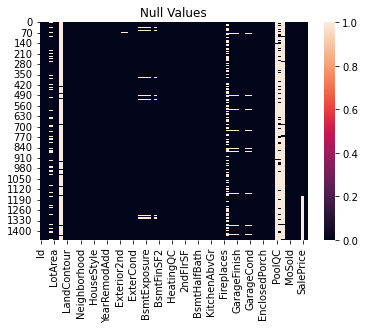

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We can clearly see that few rows has null values:

1. LotFrontage has 214 null values

2. Alley has 1091 null values

3. BsmtQual has 30 null values

4. BsmtCond has 30 null values

5. BsmtExposure has 31 null values

6. BsmtFinType1 has 30 null values

7. BsmtFinType2 has 31 null values

8. FireplaceQu has 551 null values

9. GarageType has 64 null values

10. GarageYrBlt has 64 null values

11. GarageFinish has 64 null values

12. GarageQual has 64 null values

13. GarageCond has 64 null values

14. PoolQC has 1161 null values

15. Fence has 931 null values

16. MiscFeature has 1124 null values



# Handling Missing Values


In [15]:
df['PoolQC'].value_counts()


Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [16]:
#We can see that most of the values are empty hene filling the empty values with NA.

df['PoolQC'].fillna('NA', inplace = True)

In [17]:
df['MiscFeature'].value_counts()


Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
# Similiarly in this column most of the rows are empty and filling it with NA

df['MiscFeature'].fillna('NA', inplace= True)

In [19]:
#checking the value counts for Alley
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [20]:
#Filling with NA
df['Alley'].fillna('NA', inplace = True)

In [21]:
#checking the valuecounts for Fence
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [22]:
#Filling with NA
df['Fence'].fillna('NA', inplace= True)

In [23]:
#Checking the valuecounts for FireplaceQu
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
#Filling the values with NA
df['FireplaceQu'].fillna('NA', inplace = True)

In [25]:
# Checking for the mean value of the column 'LotFrontage'

df['LotFrontage'].mean()

70.04995836802665

In [26]:
# Replacing the missing values with the mean of the column.

df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [27]:
# Checking for the value counts:

df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [28]:
# Replacing the missing values with 'NA'

df['GarageType'].fillna('NA', inplace=True)

In [29]:
# Replacing the missing values with 'NA' to show that Garage is not avaiable

df['GarageYrBlt'].fillna('NA', inplace = True)

In [30]:
# Checking for the value counts

df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [31]:
# Replacing the missing values with 'NA'  to show garage option is not available

df['GarageFinish'].fillna('NA', inplace=True)

In [32]:
# Replacing the missing values with 'NA' to show Garage is not available

df['GarageQual'].fillna('NA', inplace=True)

In [34]:
# Replacing the missing values with 'NA'

df['GarageCond'].fillna('NA', inplace=True)

In [35]:
# Replacing the missing values with NA 

df['BsmtFinType2'].fillna('NA', inplace=True)

In [36]:
# Replacing the missing values with NA 

df['BsmtFinType2'].fillna('NA', inplace=True)

In [37]:
# Replacing the missing values with 'NA'

df['BsmtQual'].fillna('NA', inplace=True)

In [38]:
# Replacing the missing  values with 'NA'

df['BsmtCond'].fillna('NA', inplace=True)

In [39]:
# Replacing the missing values with 'NA'

df['BsmtFinType1'].fillna('NA', inplace=True)

In [40]:
# Checking for the value counts

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
# Replacing the missing values with 'None'

df['MasVnrType'].fillna('None', inplace=True)

In [42]:
# Calculating the mean value

df['MasVnrArea'].mean()

103.68526170798899

In [43]:
# Replacing the missing values with the mean value

df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [44]:
# Checking for the value counts

df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [45]:
# Replacing the missing value with 'SBrkr'

df['Electrical'].fillna('SBrkr', inplace=True)

In [46]:
# Checking for the missing values again:

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Source             0
Length: 82, dtype: int64

We can see that all the missing values are removed from the dataset.

We're not removing the missing values of the column 'SalePrice' since the missing values belongs only for the test dataset.

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
df.describe(include=['O'])


MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460  1460     1460        1460      1460      1460   
unique        5      2     3        4           4         2         5   
top          RL   Pave    NA      Reg         Lvl    AllPub    Inside   
freq       1151   1454  1369      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageFinish GarageQual  \
count       1460         1460       1460  ...         1460       1460   
unique         3           25          9  ...            4          6   
top          Gtl        NAmes       Norm  ...          Unf         TA   
freq        1382          225       1260  ...          605       1311   

       GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  \
count        1460       1460   1460  1460        1460     1460          1460   
unique          6          3      4     5           5        9             6   
top            TA          Y     NA    NA          NA       WD        Normal   
freq         1326       1340   1453  1179        1406     1267          1198   

       Source  
count    1460  
unique      2  
top     train  
freq     1168  

[4 rows x 45 columns]

# EDA ( Explotary Data Analysis )


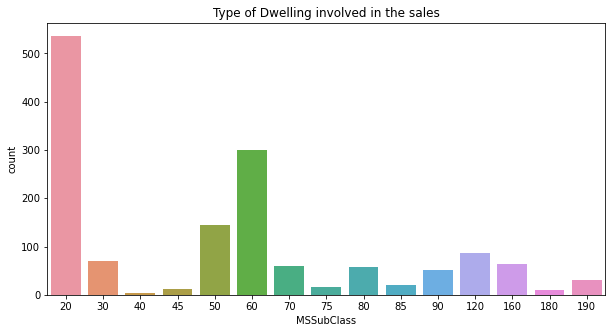

In [49]:
#Visualizing the value counts of the columns MSSubClass

plt.figure(figsize=(10, 5))
sns.countplot(df.MSSubClass) 
plt.title('Type of Dwelling involved in the sales')
plt.show()

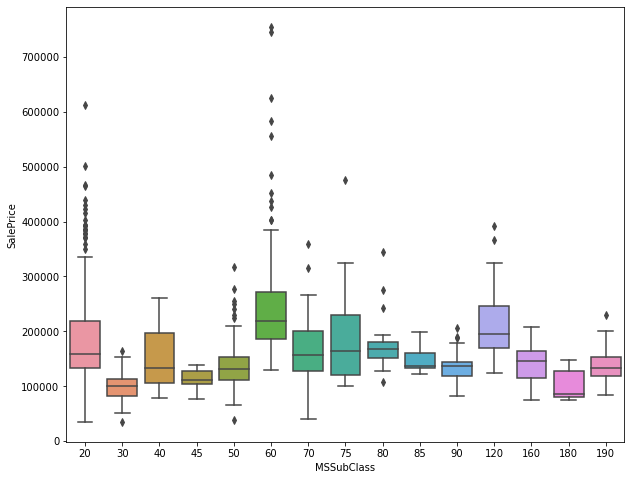

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df.sort_values('SalePrice',ascending=False))
plt.show()

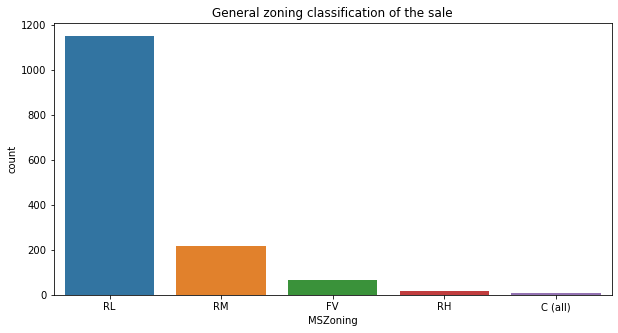

In [51]:
# Checking for the value counts of the column 'MSZoning'(Identifies the general zoning classification of the sale)

plt.figure(figsize=[10,5])
sns.countplot(df.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

We can see that the maximum number of general zoning classification of the sale is Residential Low Density (RL) and the minimum is for the commercial.



In [52]:
# Let's check for the type of road access to property

df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Observations:

For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.

In [53]:
# Let's check for the type of road access to property

df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

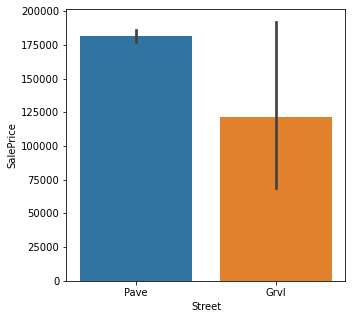

In [54]:
# Checking for the sale price on the basis of road access to the property

plt.figure(figsize=[5,5])
sns.barplot(x='Street', y='SalePrice', data = df.sort_values('SalePrice', ascending=False))

plt.show()

we can observe that the property with the road access of Pave is in more demand and so its price is also high.



<AxesSubplot:ylabel='Alley'>

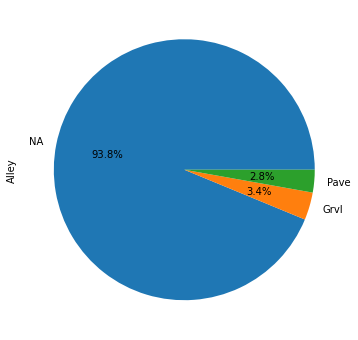

In [55]:
# Let's check for the alley access to property

plt.figure(figsize=[6,6])
df['Alley'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 94% property have no alley access.



<Figure size 576x432 with 0 Axes>

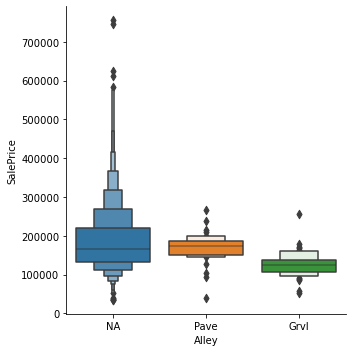

In [56]:
# Let's check the effect of alley access on the sale price.

plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can observe that the effect of alley access to the properties is very less. So, it is better to remove this column as approx 94% of properties has no alley access.



In [57]:
# Dropping the alley column

df = df.drop(['Alley'], axis=1)

df.head() # Checking the dataset after removing the Alley column

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub    Inside  ...     NA     NA          NA       0      2   2007   
1    AllPub    Inside  ...     NA     NA          NA       0     10   2007   
2    AllPub   CulDSac  ...     NA     NA          NA       0      6   2007   
3    AllPub    Inside  ...     NA  MnPrv          NA       0      1   2010   
4    AllPub       FR2  ...     NA     NA          NA       0      6   2009   

   SaleType  SaleCondition  SalePrice  Source  
0        WD         Normal   128000.0   train  
1        WD         Normal   268000.0   train  
2        WD         Normal   269790.0   train  
3       COD         Normal   190000.0   train  
4        WD         Normal   215000.0   train  

[5 rows x 81 columns]

<AxesSubplot:ylabel='LotShape'>

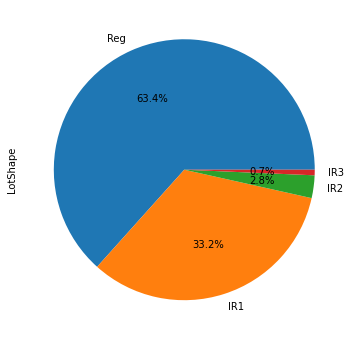

In [58]:
# Let's check for the General shape of property

plt.figure(figsize=[6,6])
df['LotShape'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

We can see that most of the properties are of regular shape (approx 63%).

Approx 33% properties are of slightly irregular shape.

<Figure size 576x288 with 0 Axes>

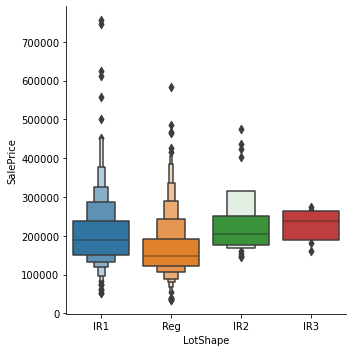

In [59]:
# Checking the relation of property shape on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<AxesSubplot:xlabel='LandContour', ylabel='count'>

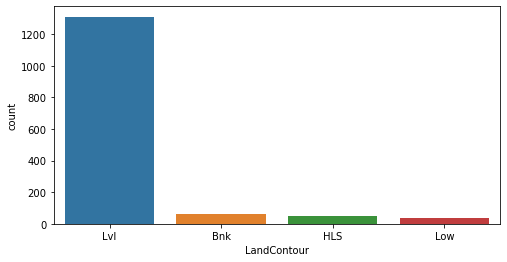

In [60]:
# Let's check for the Flatness of the property

plt.figure(figsize=[8,4])
sns.countplot(df['LandContour'])

Most of the properties are of near flat level



<Figure size 576x288 with 0 Axes>

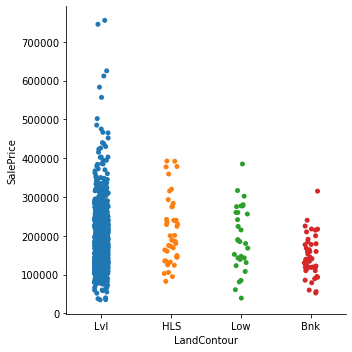

In [61]:
# Let's check for the effect of flatness of the property on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

<AxesSubplot:ylabel='Utilities'>

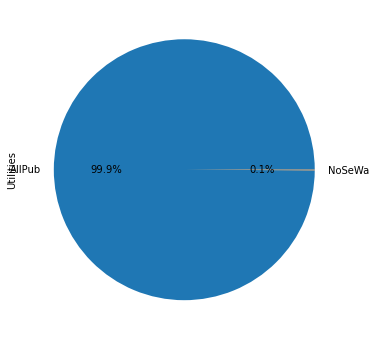

In [62]:
# Let's check for the type of utilities available in the property

plt.figure(figsize=[6,6])
df['Utilities'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 100% properties have all public Utilities (E,G,W,& S). So, we can drop this column as this will not contribute to the dataset in the model building.



In [63]:
# Dropping the 'Utilities' column

df = df.drop(['Utilities'], axis=1)

df.head() # Checking the dataset again

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  LotConfig LandSlope  ... PoolQC  Fence MiscFeature MiscVal MoSold  YrSold  \
0    Inside       Gtl  ...     NA     NA          NA       0      2    2007   
1    Inside       Mod  ...     NA     NA          NA       0     10    2007   
2   CulDSac       Gtl  ...     NA     NA          NA       0      6    2007   
3    Inside       Gtl  ...     NA  MnPrv          NA       0      1    2010   
4       FR2       Gtl  ...     NA     NA          NA       0      6    2009   

   SaleType  SaleCondition  SalePrice Source  
0        WD         Normal   128000.0  train  
1        WD         Normal   268000.0  train  
2        WD         Normal   269790.0  train  
3       COD         Normal   190000.0  train  
4        WD         Normal   215000.0  train  

[5 rows x 80 columns]

<AxesSubplot:ylabel='LotConfig'>

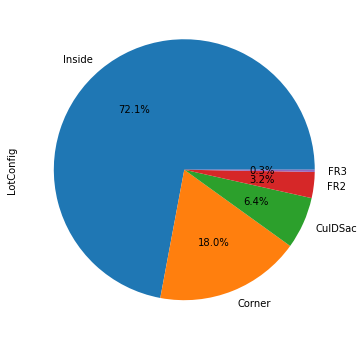

In [64]:
# Let's check for the lot configuration

plt.figure(figsize=[6,6])
df['LotConfig'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 72% properties have inside lot configuration.

18% properties have corner lot.

Only 0.3% properties have frontage on 3 sides of property.

<Figure size 432x288 with 0 Axes>

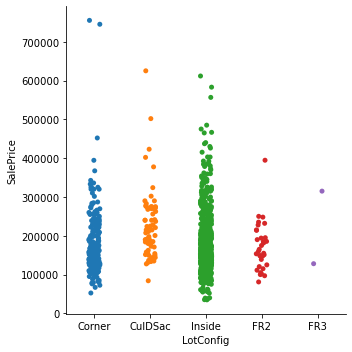

In [65]:
# Checking for the lot configuration and its effect on the sale pricing.

plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

<AxesSubplot:ylabel='LandSlope'>

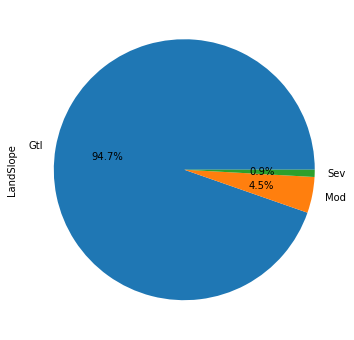

In [66]:
# Let's check for the slope of the property

plt.figure(figsize=[6,6])
df['LandSlope'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 95% properties having gentle slope.

Only approx 1% properties having severe Slope and 4.5% properites having moderate slope.

<Figure size 576x432 with 0 Axes>

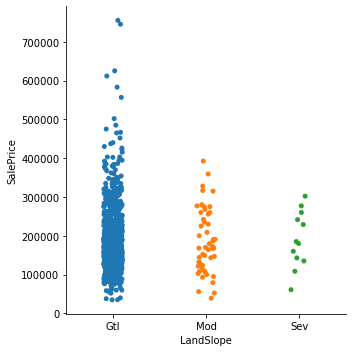

In [67]:
# Cheecking for the slope wise sale pricing of the properties

plt.figure(figsize=[8,6])
sns.catplot(x='LandSlope', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.



In [68]:
# Let's look at the physical locations within Ames city limits

df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Maximum properties are having North Ames (225).

Only 2 properties are having Bluestem.

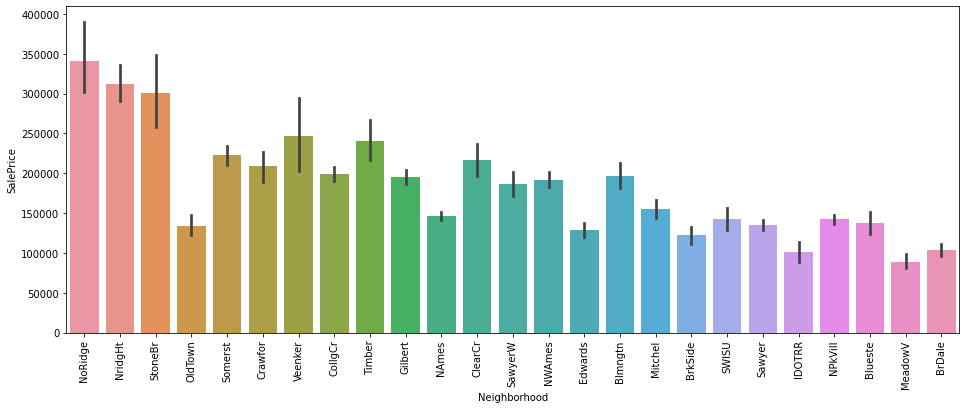

In [69]:
# Checking for the effect of physical locations within Ames city limits on the sale price

plt.figure(figsize=[16,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [70]:
# Let's check for the proximity to various conditions

df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [71]:
# Checking for the value counts of Condition2 column (Proximity to various conditions (if more than one is present))

df['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

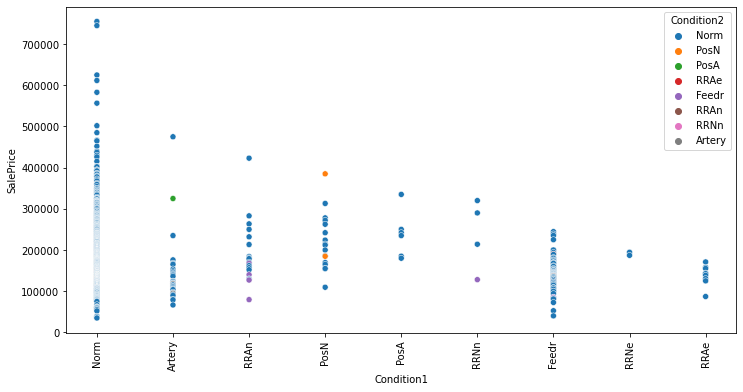

In [72]:
# Checking for the sale pricing proximity wise

plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [73]:
# Checking for the value counts of type of dwelling 

df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Single-family Detached dewlling is most popular.

Two-family Conversion; originally built as one-family dwelling is least popular.

In [74]:
# Checking for the value counts of the style of dwelling

df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

One story style of houses are most popular.

Two and one-half story: 2nd level finished style of house is least popular.

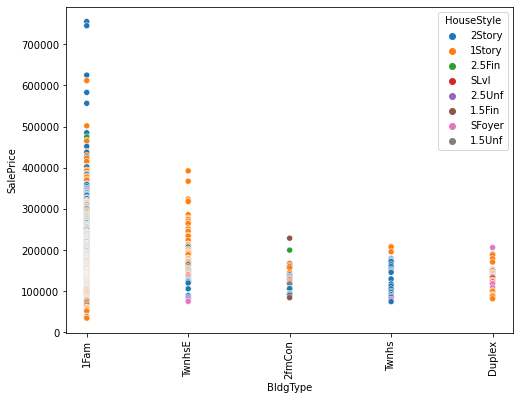

In [76]:
# Let's check for the type & style of dwelling

plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation = 90)
plt.show()

In [77]:
# Checking for the value counts of the Rates the overall material and finish of the house

df['OverallQual'].value_counts()


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Most of the houses are rated 5 which means the overall material and finish of the houses are average and above average.

Very few houses was rated 1 which says the overall material and finish of very few houses are very poor.

In [78]:
# Checking for the value counts of the rates the overall condition of the house

df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Most of the houses are rated average and above average for the overall condition of the house.

None of the houses got the ratings of very excellent.

<Figure size 576x432 with 0 Axes>

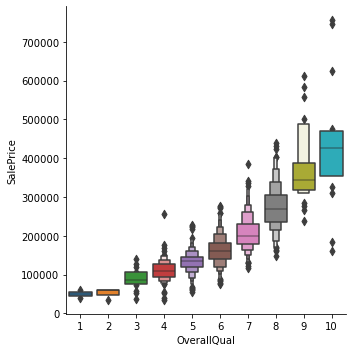

In [79]:
# Let's check for the saleprices based on the ratings of overall material and finish of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

We can see that as the ratings are increasing the price of the property is also increasing.



<Figure size 576x432 with 0 Axes>

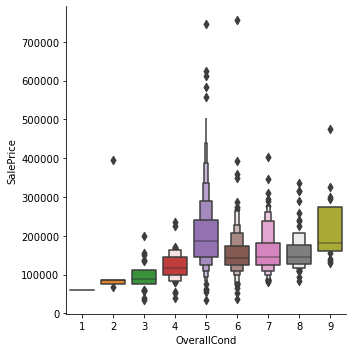

In [80]:
# Let's check for the saleprices based on the ratings of overall condition of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

We can see that the price of the house is highest for the house which got 9 ratings (Excellent)



In [81]:
# Let's check for the value counts of type of roof of the houses

df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Maximum houses having Gable type of roof.



In [82]:
# Checking for the value counts of the material used for the roof.

df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

Maximum houses having the roof which is made up of Standard (Composite) Shingle



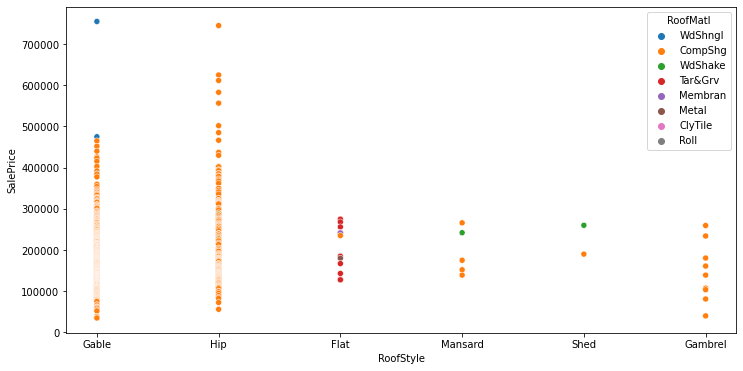

In [83]:
# Let's check for the effect of roof on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = df.sort_values('SalePrice', ascending=False))

plt.show()# Let's check for the value counts of the exterior covering on house

df['Exterior1st'].value_counts()

In [84]:
# Let's check for the value counts of the exterior covering on house

df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [85]:
# Checking for the value counts of the exterior covering on house (if more than one material)

df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

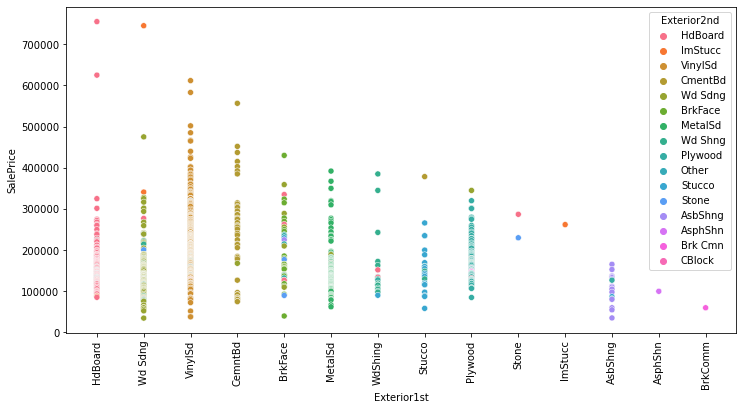

In [86]:
# Let's check for the exterior covering on the house and its effect on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [87]:
# Let's check for the value counts of the masonry veneer type

df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

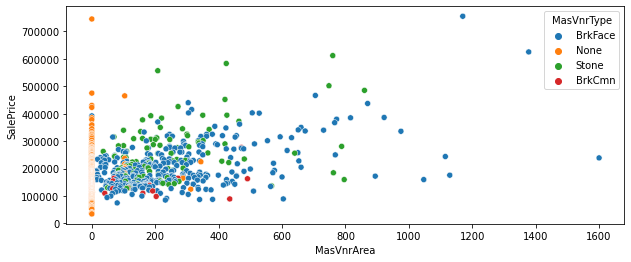

In [88]:
# Let's check for the sale price based on the masonry veneer

plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = df.sort_values('SalePrice', ascending=False))

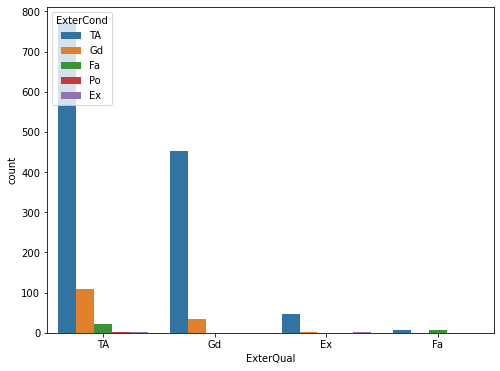

In [89]:
#Let's check for the value counts of the quality of the material on the exterior

plt.figure(figsize=[8,6])
sns.countplot(x='ExterQual', hue = 'ExterCond', data = df)
plt.show()

Most of the houses are of average/typical quality of the material on the exterior.

None houses have poor quality of material on the exterior.

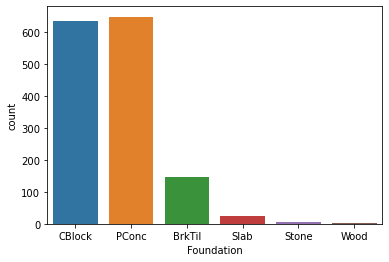

In [90]:
# Let's check for the type of foundation

plt.figure(figsize=[6,4])
sns.countplot(x='Foundation', data = df)

plt.show()

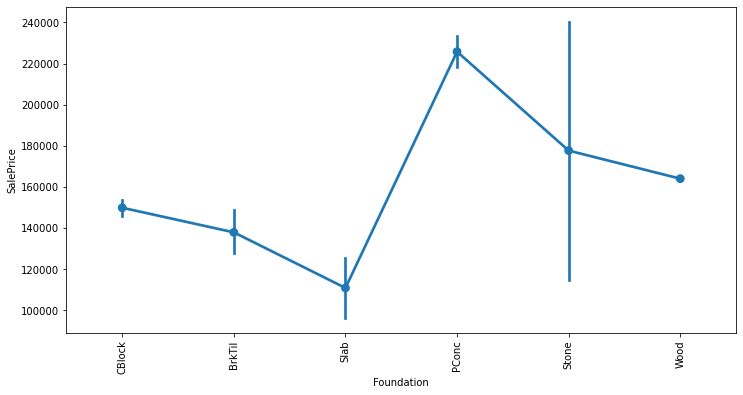

In [91]:
# Let's check for the effect of foundation on the sale price

plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

In [92]:
# Let's check for the central air conditioning

df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

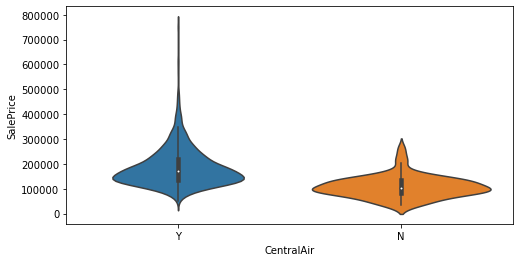

In [93]:
# Checking for the price of the houses on the basis of air conditioning

plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

Houses having the option of central air conditioning have more price.



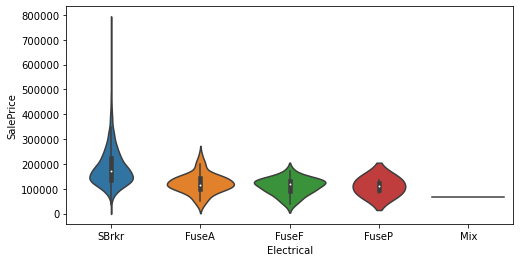

In [94]:
# Let's check for the electrical system of the house

plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

Most of the houses are having the electrical system of standard circuit breakers and romex.



In [95]:
# Let's check value count for the home functionality (Assume typical unless deductions are warranted)

df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Maximum homes have typical funtionality



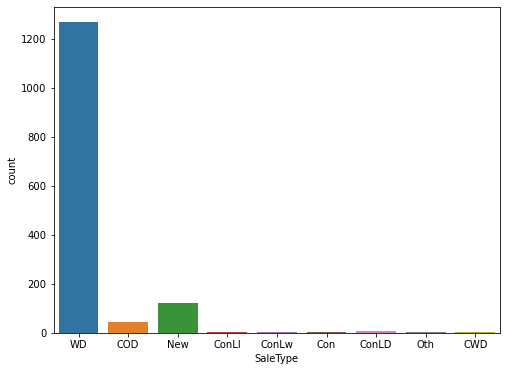

In [96]:
# Let's check for the sale type

plt.figure(figsize=[8,6])
sns.countplot(df['SaleType'])
plt.show()

Most of the sale type are Warranty Deed - Conventional.



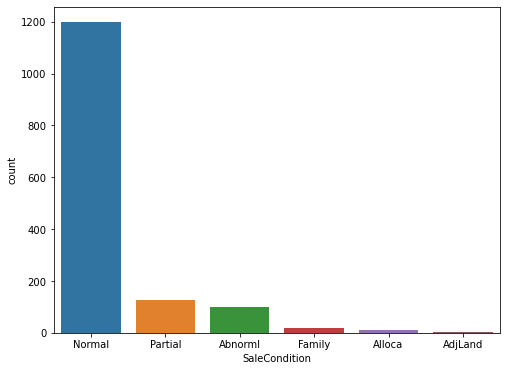

In [97]:
# Checking for the value counts of the condition of sale

plt.figure(figsize=[8,6])
sns.countplot(df['SaleCondition'])
plt.show()

Most of the sale are normal sale.



# Label Encoding the categorical column:


In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_columns = ('MSZoning', 'Street','LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Source')

for c in cat_columns:
    le.fit(list(df[c].values))
    le.classes_
    df[c] = le.transform(list(df[c].values))

In [99]:
# Checking the dataset again after label encoding

df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  ...  PoolQC  Fence  MiscFeature  \
0            3          4          0  ...       3      4            1   
1            3          4          1  ...       3      4            1   
2            3          1          0  ...       3      4            1   
3            3          4          0  ...       3      2            1   
4            3          2          0  ...       3      4            1   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  Source  
0        0       2    2007         8              4   128000.0       1  
1        0      10    2007         8              4   268000.0       1  
2        0       6    2007         8              4   269790.0       1  
3        0       1    2010         0              4   190000.0       1  
4        0       6    2009         8              4   215000.0       1  

[5 rows x 80 columns]

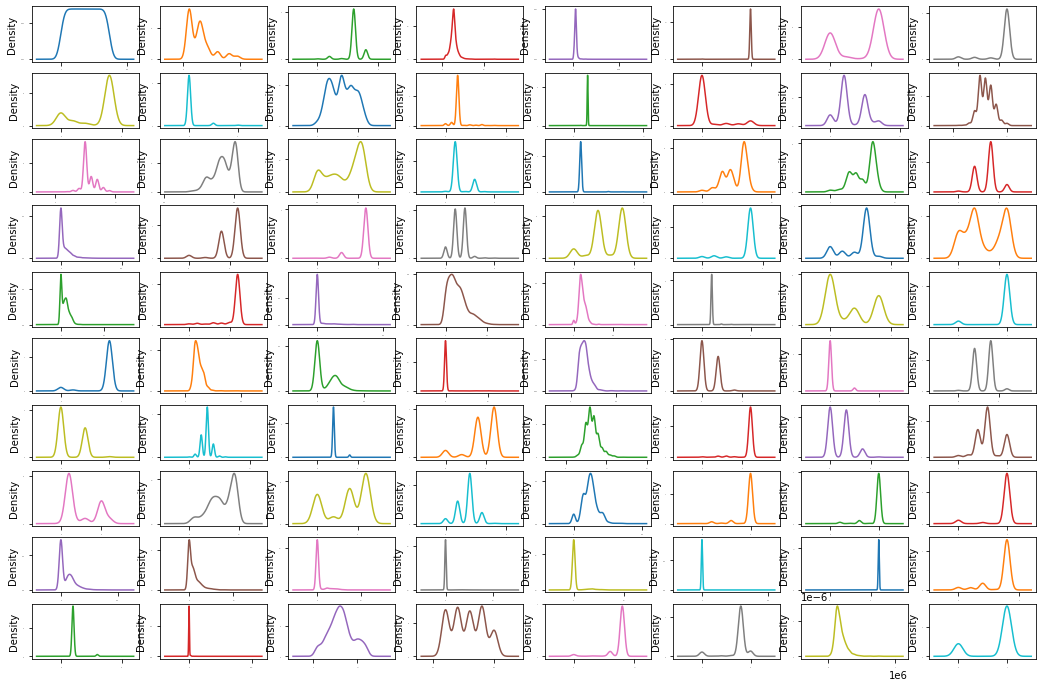

In [100]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

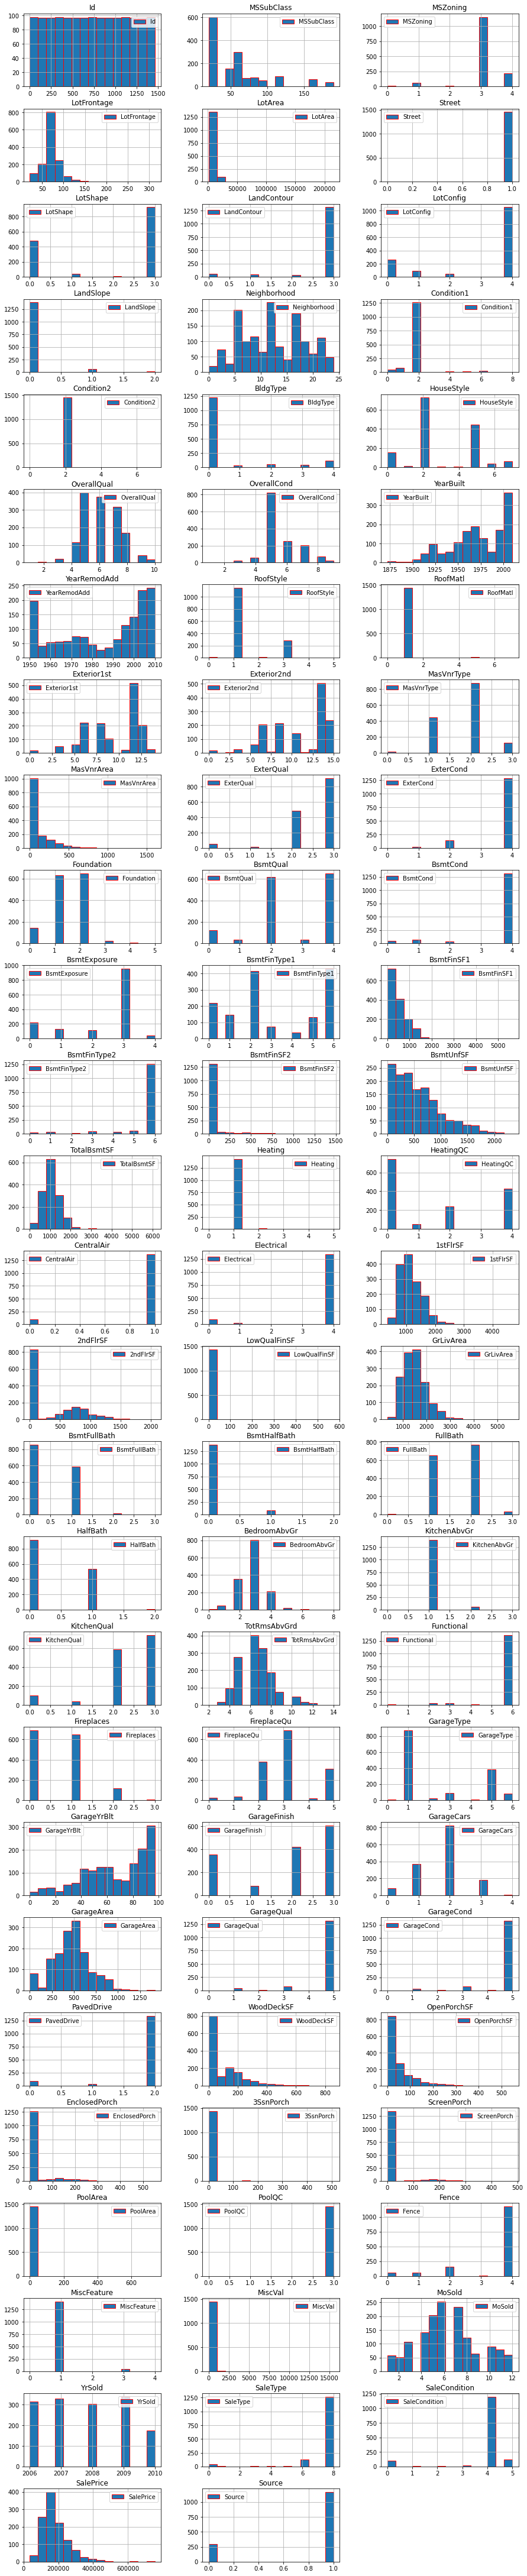

In [101]:
df.hist(figsize=(15,100),edgecolor='red',layout=(34,3),bins=15,legend=True)
plt.show()

# Corealtion between features and target ' SALE - PRICE ' ( EDA )


In [102]:
df.corr()


Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
...                 ...         ...       ...          ...       ...   
YrSold         0.000712   -0.021407 -0.020628     0.006768 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.030846  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058464  0.034169   
SalePrice     -0.023897   -0.060775 -0.133221     0.323850  0.249499   
Source        -0.030199   -0.006115 -0.047700     0.069635 -0.006430   

                 Street  LotShape  LandContour  LotConfig  LandSlope  ...  \
Id             0.008916  0.032122    -0.019659   0.049756   0.005847  ...   
MSSubClass    -0.024969  0.119289    -0.002940   0.075910  -0.025672  ...   
MSZoning       0.087654  0.061887    -0.017854  -0.009895  -0.022055  ...   
LotFrontage   -0.037323 -0.144931    -0.075647  -0.181253   0.067608  ...   
LotArea       -0.197131 -0.165315    -0.149083  -0.121161   0.436868  ...   
...                 ...       ...          ...        ...        ...  ...   
YrSold        -0.025043  0.036449     0.020507  -0.005992  -0.002305  ...   
SaleType       0.014339 -0.000911    -0.025754   0.014325   0.054858  ...   
SaleCondition  0.006064 -0.038118     0.033809   0.051579  -0.043095  ...   
SalePrice      0.044753 -0.248171     0.032836  -0.060452   0.015485  ...   
Source         0.021413 -0.005835    -0.009682  -0.018368   0.013642  ...   

                 PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  \
Id            -0.033928 -0.000399    -0.038103 -0.006242  0.021172  0.000712   
MSSubClass    -0.005221  0.086360    -0.046881 -0.007683 -0.013585 -0.021407   
MSZoning       0.002882 -0.061289    -0.005553  0.009293 -0.031496 -0.020628   
LotFrontage   -0.191630 -0.036751     0.009213  0.001168  0.010158  0.006768   
LotArea       -0.065167  0.036031     0.106135  0.038068  0.001205 -0.014261   
...                 ...       ...          ...       ...       ...       ...   
YrSold         0.060904 -0.035366     0.057708  0.004906 -0.145721  1.000000   
SaleType      -0.013592 -0.006154    -0.003340  0.015773 -0.047386 -0.002327   
SaleCondition  0.097425  0.100675    -0.008074  0.013027  0.013320  0.003880   
SalePrice     -0.141136  0.143922    -0.063477 -0.013071  0.072764 -0.045508   
Source        -0.031652 -0.054729     0.005524  0.015429  0.016473 -0.016509   

               SaleType  SaleCondition  SalePrice    Source  
Id             0.019773      -0.005806  -0.023897 -0.030199  
MSSubClass     0.012464      -0.024940  -0.060775 -0.006115  
MSZoning       0.097437       0.009494  -0.133221 -0.047700  
LotFrontage   -0.030846       0.058464   0.323850  0.069635  
LotArea        0.012292       0.034169   0.249499 -0.006430  
...                 ...            ...        ...       ...  
YrSold        -0.002327       0.003880  -0.045508 -0.016509  
SaleType       1.000000       0.184067  -0.050851 -0.060919  
SaleCondition  0.184067       1.000000   0.217687 -0.003112  
SalePrice     -0.050851       0.217687   1.000000       NaN  
Source        -0.060919      -0.003112        NaN  1.000000  

[80 rows x 80 columns]

In [103]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['SalePrice'].sort_values()

ExterQual      -0.624820
BsmtQual       -0.601307
KitchenQual    -0.592468
GarageFinish   -0.424922
GarageType     -0.415370
                  ...   
GarageCars      0.628329
GrLivArea       0.707300
OverallQual     0.789185
SalePrice       1.000000
Source               NaN
Name: SalePrice, Length: 80, dtype: float64

<AxesSubplot:>

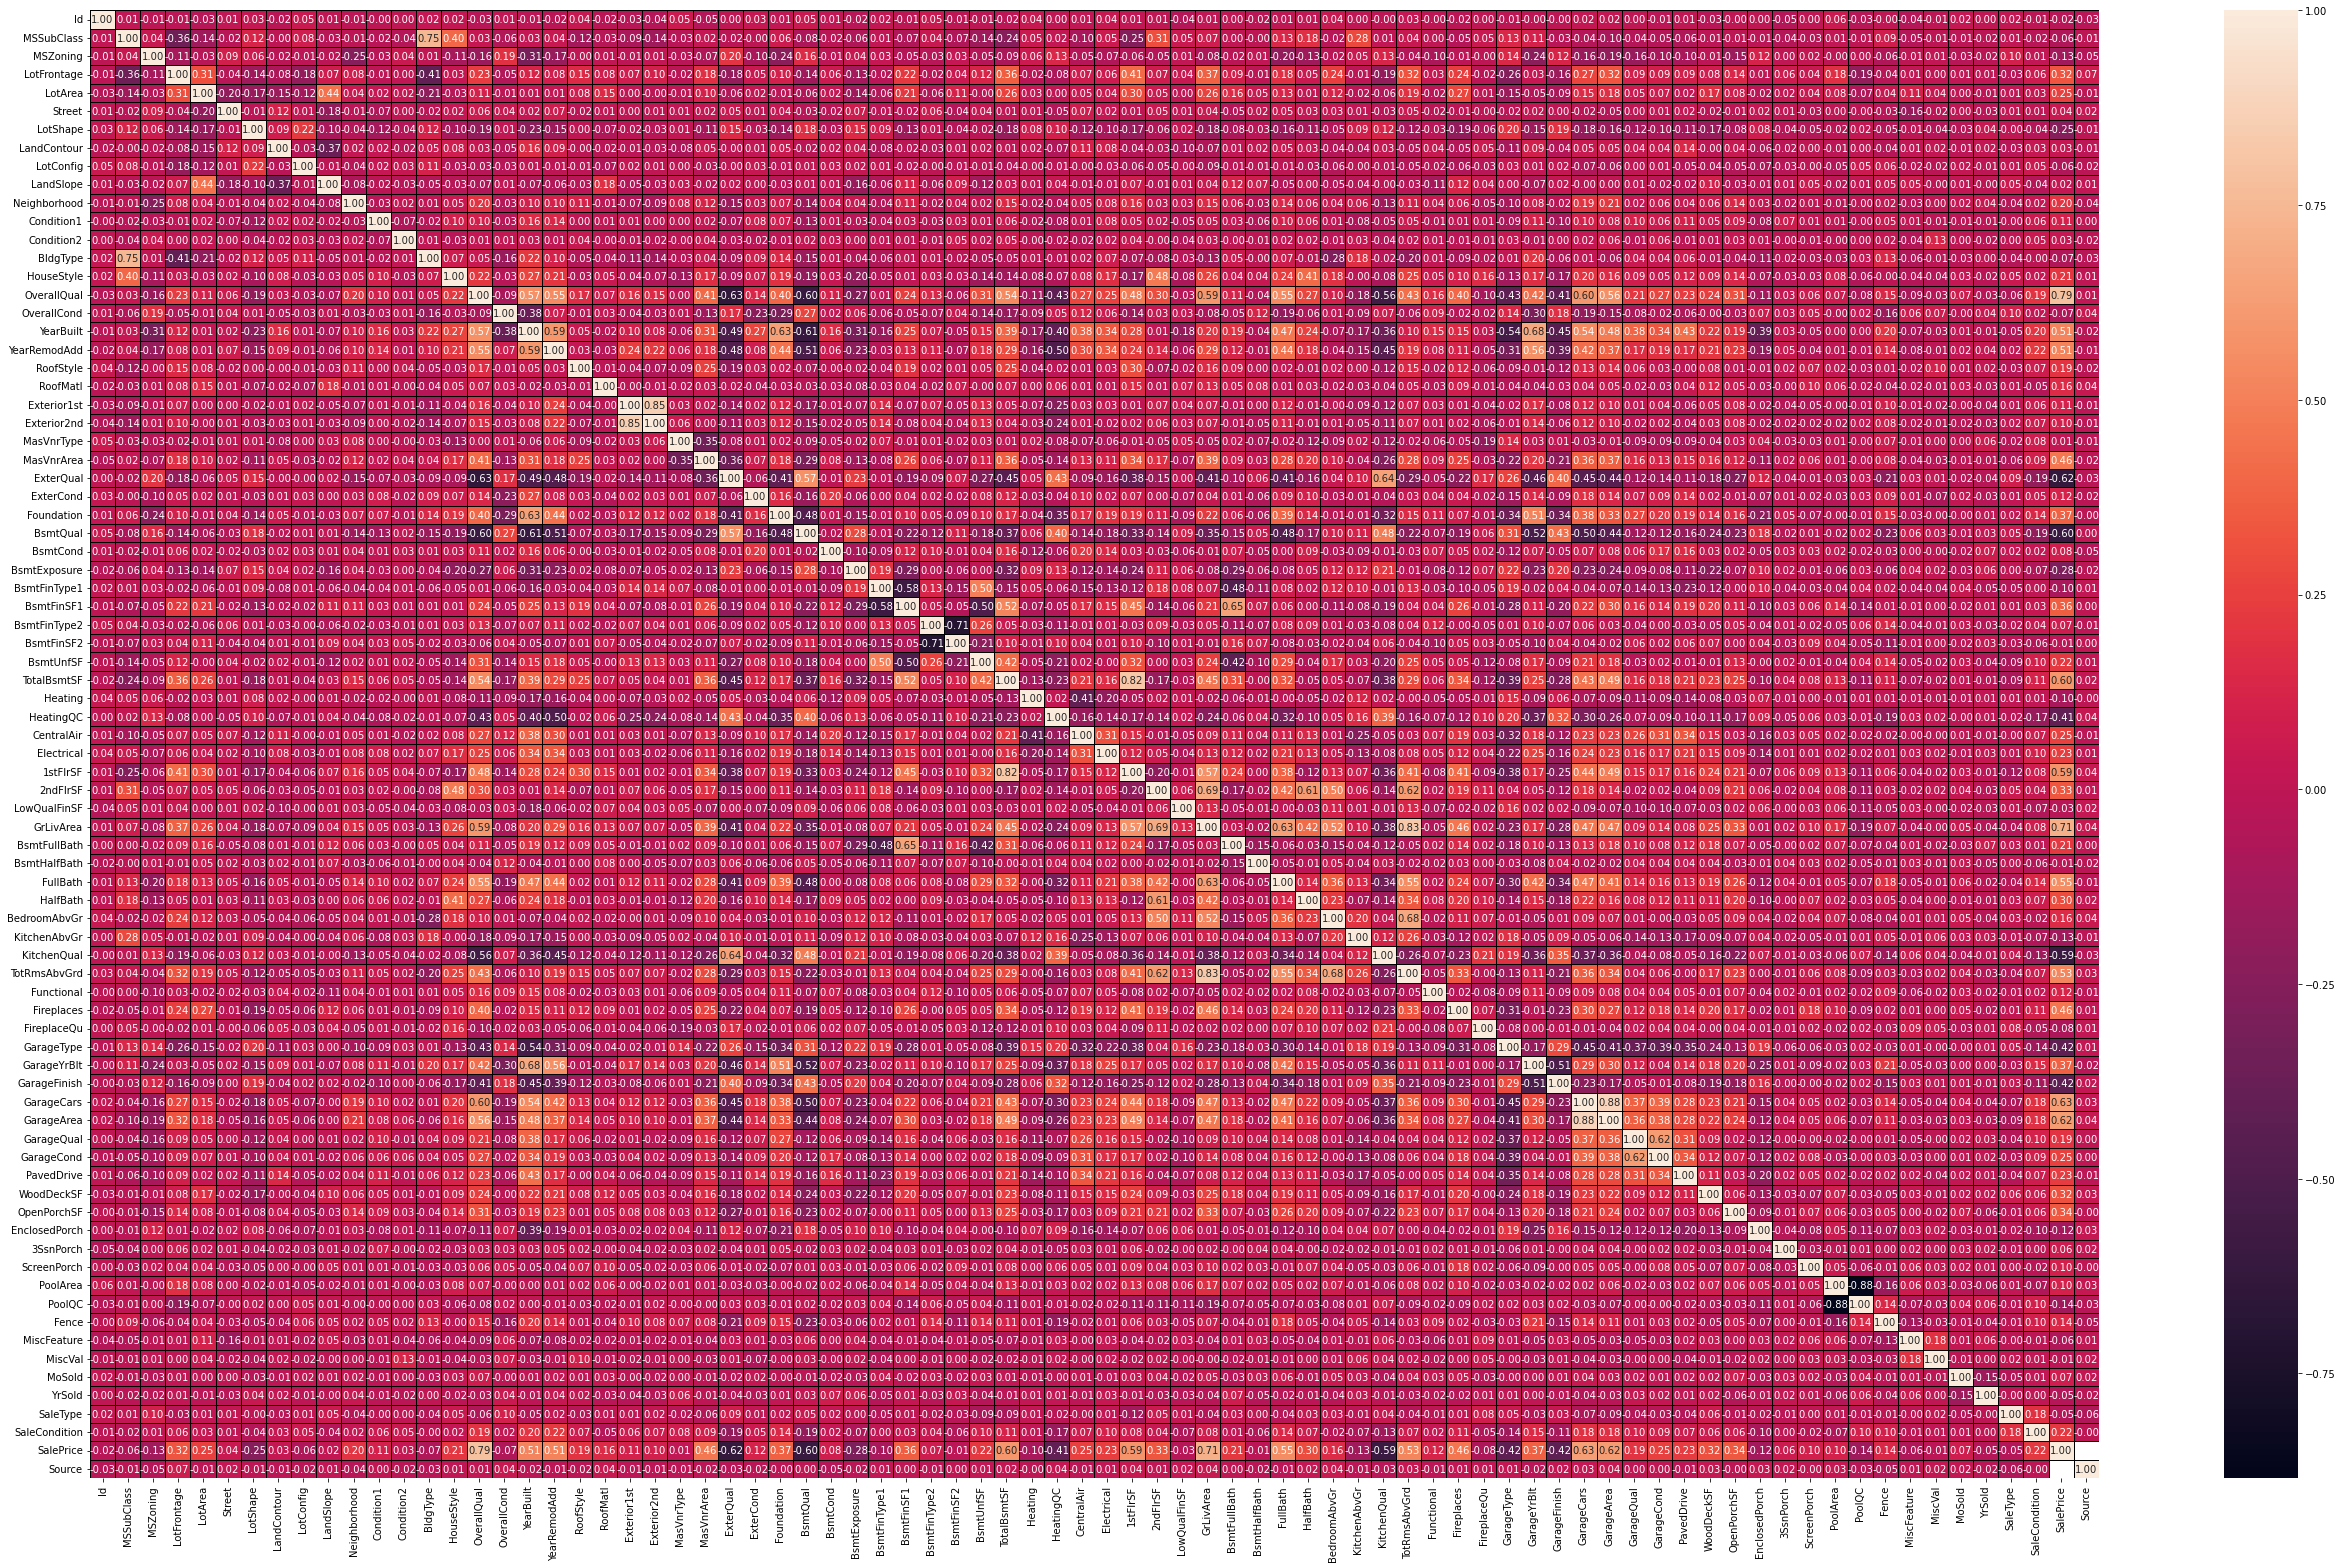

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(45,27))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Descriptive Statistics


In [105]:
df.describe()


Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    70.049958   10516.828082   
std     421.610009    42.300571     0.632017    22.024023    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    70.049958    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     1.942466     2.777397     3.019178     0.062329  ...   
std       0.063996     1.409156     0.707666     1.622634     0.276232  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     3.000000     2.000000     0.000000  ...   
50%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
75%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
max       1.000000     3.000000     3.000000     4.000000     2.000000  ...   

            PoolQC        Fence  MiscFeature       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      2.991096     3.504795     1.069178     43.489041     6.321918   
std       0.140703     1.082912     0.372102    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       3.000000     4.000000     1.000000      0.000000     5.000000   
50%       3.000000     4.000000     1.000000      0.000000     6.000000   
75%       3.000000     4.000000     1.000000      0.000000     8.000000   
max       3.000000     4.000000     4.000000  15500.000000    12.000000   

            YrSold     SaleType  SaleCondition      SalePrice       Source  
count  1460.000000  1460.000000    1460.000000    1168.000000  1460.000000  
mean   2007.815753     7.513014       3.770548  181477.005993     0.800000  
std       1.328095     1.552100       1.100854   79105.586863     0.400137  
min    2006.000000     0.000000       0.000000   34900.000000     0.000000  
25%    2007.000000     8.000000       4.000000  130375.000000     1.000000  
50%    2008.000000     8.000000       4.000000  163995.000000     1.000000  
75%    2009.000000     8.000000       4.000000  215000.000000     1.000000  
max    2010.000000     8.000000       5.000000  755000.000000     1.000000  

[8 rows x 80 columns]

<AxesSubplot:>

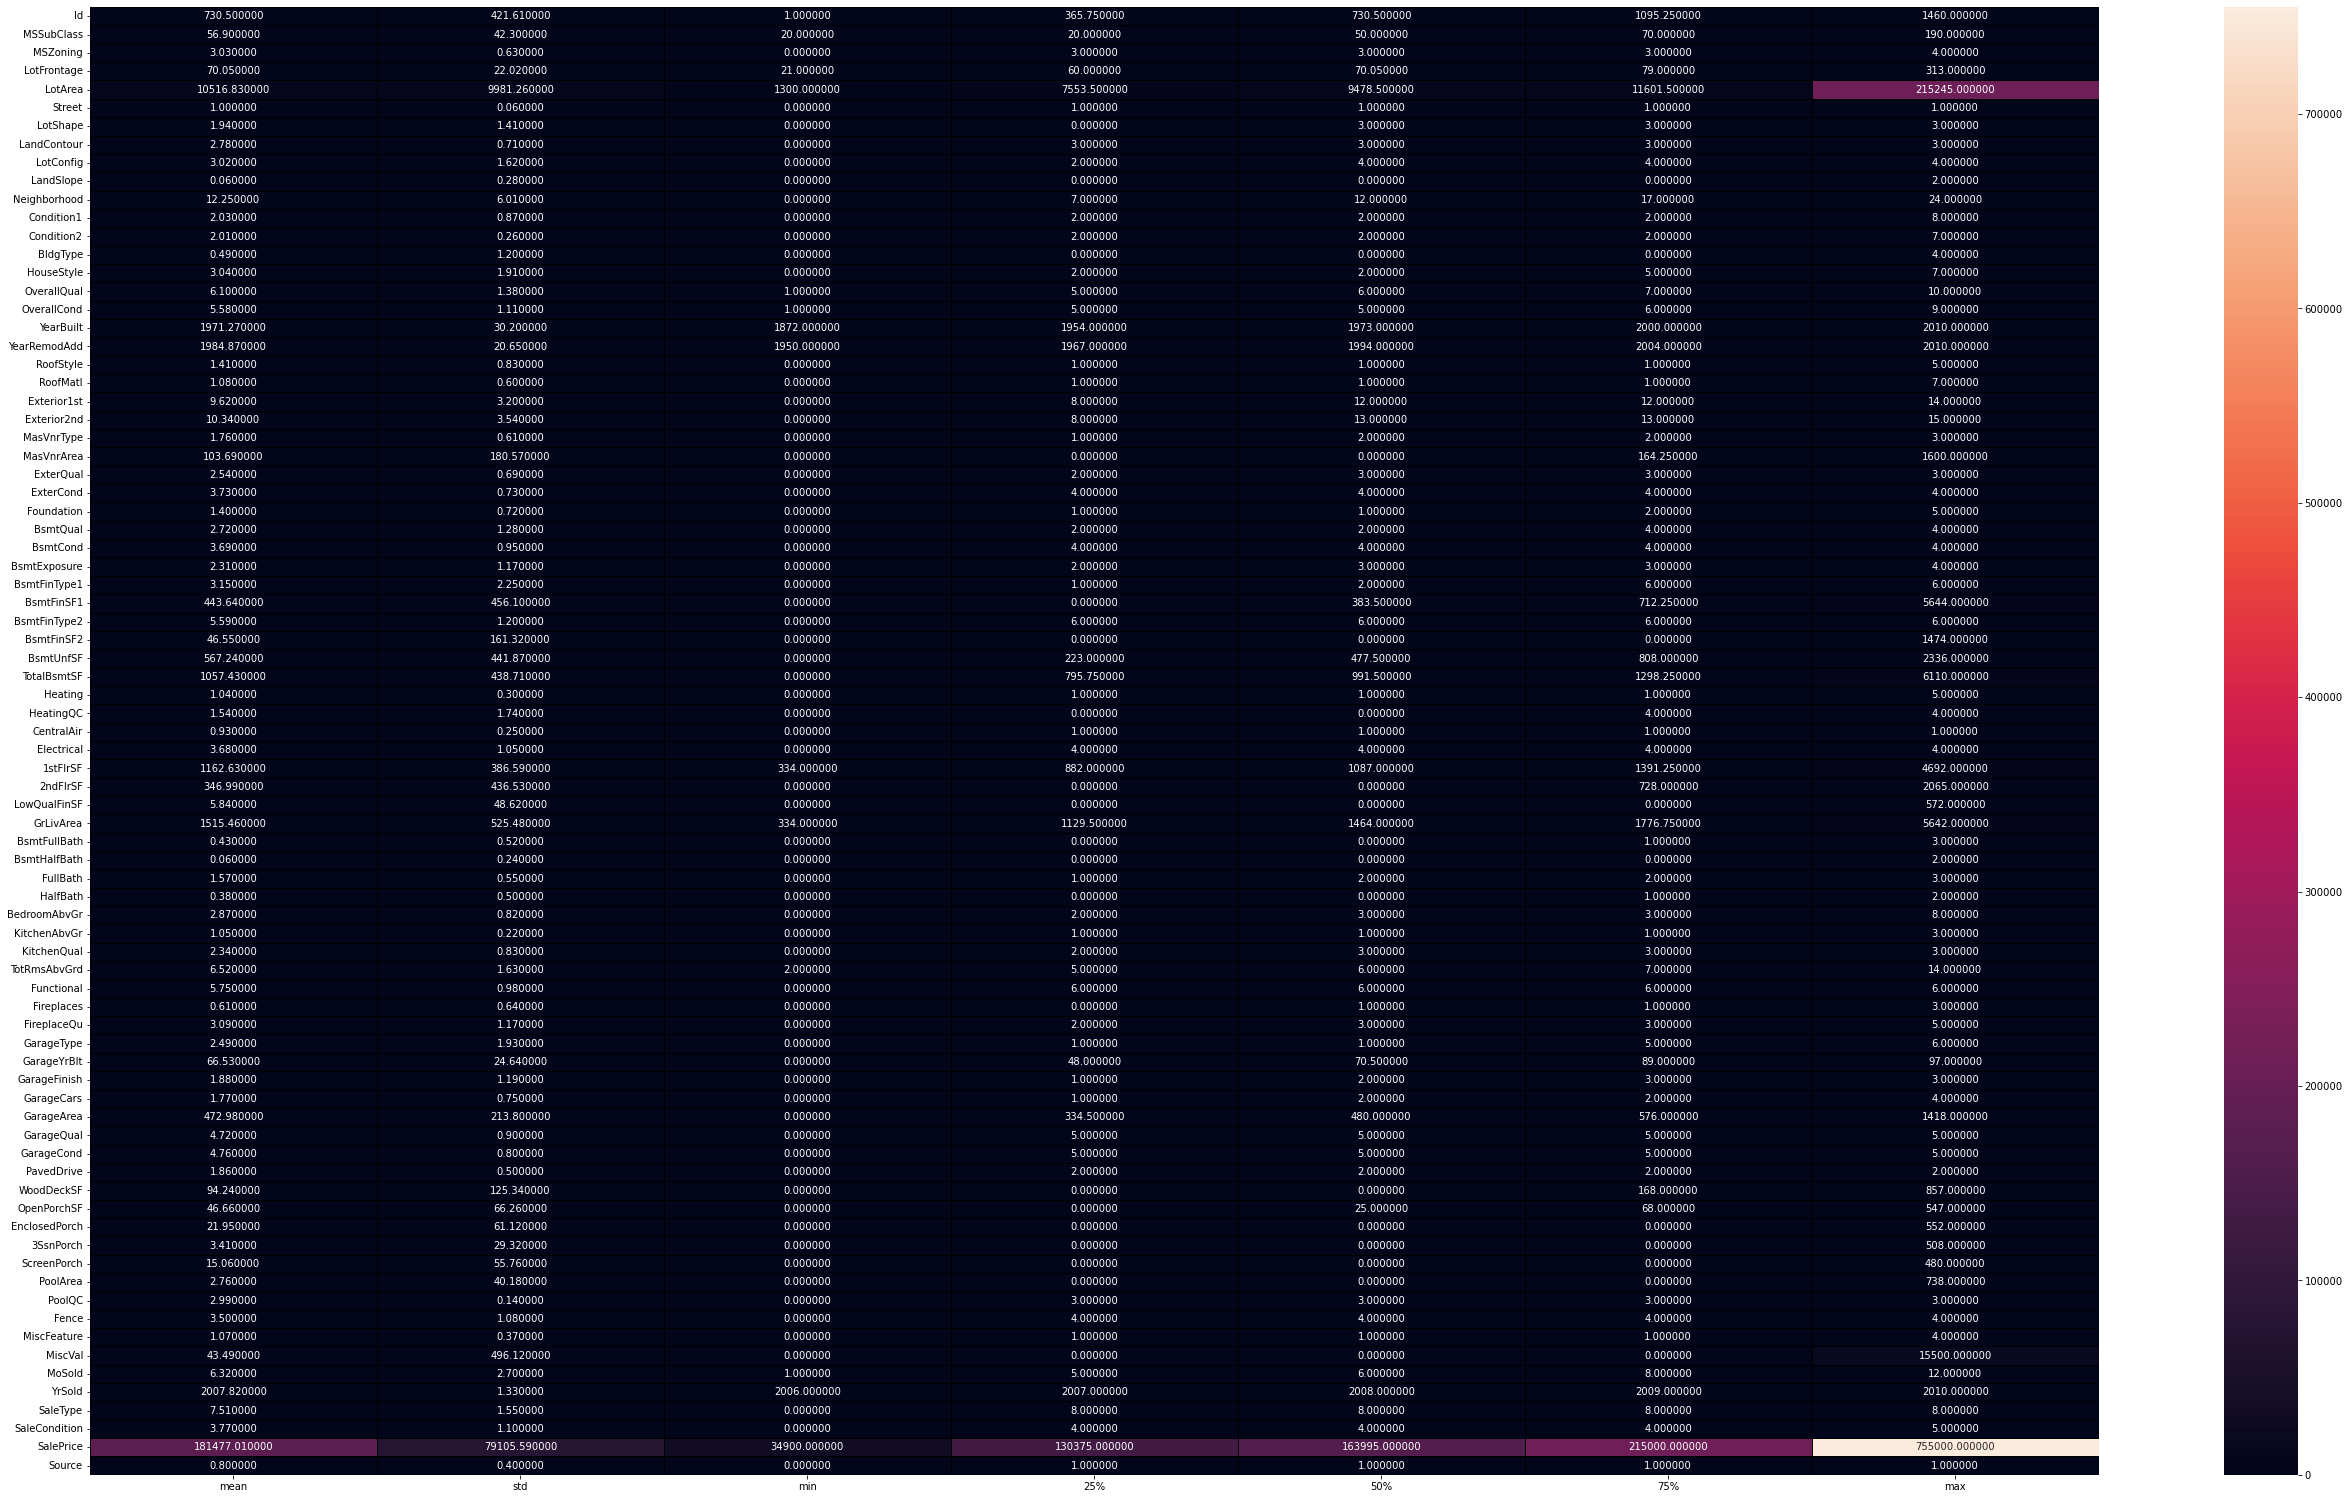

In [106]:
plt.figure(figsize=(45,27))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Splitting the Dataset into Training and Test dataset:


In [108]:
#training dataset:

df3 = df[:1168]

df3 = df3.drop(['Source'],axis = 1)

df3.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1163  289          20         3    70.049958     9819       1         0   
1164  554          20         3    67.000000     8777       1         3   
1165  196         160         3    24.000000     2280       1         3   
1166   31          70         0    50.000000     8500       1         3   
1167  617          60         3    70.049958     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  PoolArea  PoolQC  Fence  \
1163            3          4          0  ...         0       3      2   
1164            3          4          0  ...         0       3      2   
1165            3          2          0  ...         0       3      4   
1166            3          4          0  ...         0       3      2   
1167            3          4          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1163            1        0       2    2010         8              4   122000.0  
1164            1        0       5    2009         8              4   108000.0  
1165            1        0       7    2009         8              4   148500.0  
1166            1        0       7    2008         8              4    40000.0  
1167            1        0       6    2006         8              4   183200.0  

[5 rows x 79 columns]

In [109]:
#test dataset:

df4 = df[1168:]
df4 = df4.drop(['Source','SalePrice'],axis=1)

df4.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1168   337          20         3    86.000000    14157       1         0   
1169  1018         120         3    70.049958     5814       1         0   
1170   929          20         3    70.049958    11838       1         3   
1171  1148          70         3    75.000000    12000       1         3   
1172  1227          60         3    86.000000    14598       1         0   

      LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
1168            1          0          0  ...            0         0       3   
1169            3          1          0  ...            0         0       3   
1170            3          4          0  ...            0         0       3   
1171            0          4          0  ...            0         0       3   
1172            3          1          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
1168      4            1        0       7    2007         8              4  
1169      4            1        0       8    2009         0              0  
1170      4            1        0       6    2009         8              4  
1171      4            1        0       7    2009         8              4  
1172      4            1        0       1    2008         8              4  

[5 rows x 78 columns]

# Checking Data To Remove Skewness


In [110]:
df3.iloc[:,:-1].head()


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
0            3          4          0  ...            0         0       3   
1            3          4          1  ...          224         0       3   
2            3          1          0  ...            0         0       3   
3            3          4          0  ...            0         0       3   
4            3          2          0  ...            0         0       3   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0      4            1        0       2    2007         8              4  
1      4            1        0      10    2007         8              4  
2      4            1        0       6    2007         8              4  
3      2            1        0       1    2010         0              4  
4      4            1        0       6    2009         8              4  

[5 rows x 78 columns]

In [111]:
df3.iloc[:,:-1].skew()


Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.732333
LotArea          10.659285
                   ...    
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
Length: 78, dtype: float64

In [112]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df3.iloc[:,:-1],method='yeo-johnson')

df3.iloc[:,:-1]=pd.DataFrame(x_new,columns=df3.iloc[:,:-1].columns)

In [113]:
df3.iloc[:,:-1].skew()


Id              -0.268486
MSSubClass       0.064007
MSZoning         0.233113
LotFrontage      0.156187
LotArea          0.032509
                   ...   
MiscVal          4.991071
MoSold          -0.035838
YrSold           0.112893
SaleType        -2.067563
SaleCondition   -0.353292
Length: 78, dtype: float64

# Outliers Checking


Id                  AxesSubplot(0.125,0.840263;0.133621x0.0397368)
MSSubClass       AxesSubplot(0.285345,0.840263;0.133621x0.0397368)
MSZoning          AxesSubplot(0.44569,0.840263;0.133621x0.0397368)
LotFrontage      AxesSubplot(0.606034,0.840263;0.133621x0.0397368)
LotArea          AxesSubplot(0.766379,0.840263;0.133621x0.0397368)
                                       ...                        
MoSold           AxesSubplot(0.766379,0.172684;0.133621x0.0397368)
YrSold                 AxesSubplot(0.125,0.125;0.133621x0.0397368)
SaleType            AxesSubplot(0.285345,0.125;0.133621x0.0397368)
SaleCondition        AxesSubplot(0.44569,0.125;0.133621x0.0397368)
SalePrice           AxesSubplot(0.606034,0.125;0.133621x0.0397368)
Length: 79, dtype: object

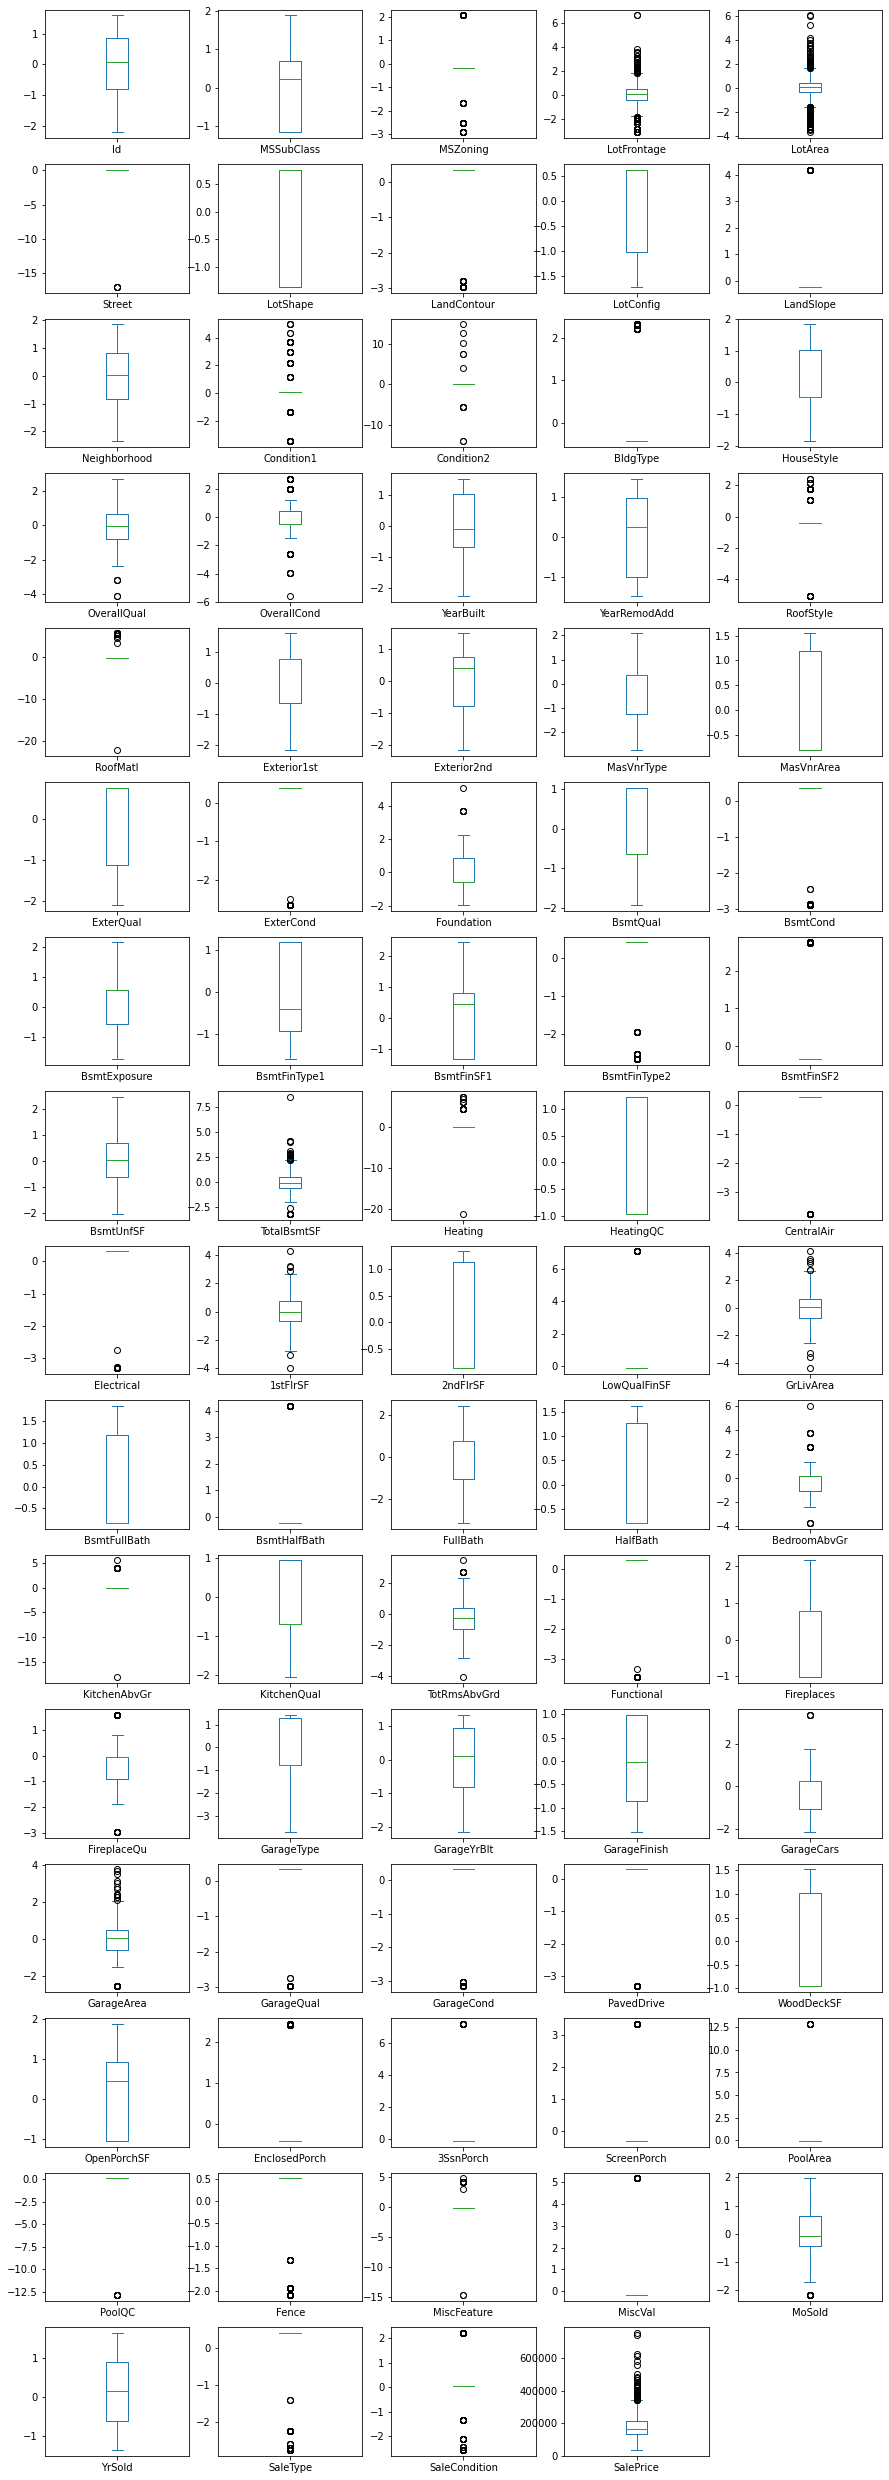

In [114]:
import warnings
warnings.filterwarnings('ignore')
df3.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))

# IQR Proximity Rule


Z - Score Technique



In [115]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df3))
z.shape

(1168, 79)

In [116]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 19, 20, ..., 39, 62, 63], dtype=int64))


In [117]:
len(np.where(z>3)[0])


1187

# Feature Engineering ( Variantion Inflation Factor )


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [119]:
df3.corr()


Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.005706 -0.005808    -0.022514 -0.028970   
MSSubClass     0.005706    1.000000  0.100951    -0.332916 -0.331206   
MSZoning      -0.005808    0.100951  1.000000    -0.178589 -0.180836   
LotFrontage   -0.022514   -0.332916 -0.178589     1.000000  0.617215   
LotArea       -0.028970   -0.331206 -0.180836     0.617215  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.025185    0.011757 -0.052209     0.027125  0.022034   
YrSold        -0.007823   -0.041986 -0.007457    -0.006006 -0.039376   
SaleType       0.028720    0.065445  0.138155    -0.084033 -0.043142   
SaleCondition -0.012993   -0.057638 -0.096625     0.111178  0.067549   
SalePrice     -0.025762   -0.001252 -0.201067     0.334107  0.369808   

                 Street  LotShape  LandContour  LotConfig  LandSlope  ...  \
Id            -0.000260  0.022364    -0.020620   0.056874   0.027550  ...   
MSSubClass    -0.017924  0.067409    -0.017552   0.058649  -0.013986  ...   
MSZoning       0.090538  0.127286     0.017095   0.005928  -0.025411  ...   
LotFrontage   -0.036699 -0.156344    -0.059032  -0.177304   0.054564  ...   
LotArea       -0.114844 -0.286754    -0.161388  -0.209140   0.162241  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.011021 -0.049665    -0.039014   0.018474   0.028010  ...   
YrSold        -0.019653  0.021508     0.012802  -0.009935  -0.013388  ...   
SaleType       0.022480  0.008355    -0.030526  -0.016697   0.075524  ...   
SaleCondition  0.029466 -0.068400     0.032407   0.040950  -0.071641  ...   
SalePrice      0.044753 -0.249873     0.000693  -0.067745   0.014471  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.059332 -0.059332  0.002958    -0.013891 -0.018491  0.025185   
MSSubClass     0.031391 -0.031391  0.113742    -0.027563 -0.032324  0.011757   
MSZoning      -0.012614  0.012614 -0.067158    -0.000458 -0.005777 -0.052209   
LotFrontage    0.164877 -0.164877 -0.067685     0.006830  0.011656  0.027125   
LotArea        0.113491 -0.113491 -0.011640     0.042461  0.093564  0.022034   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.046375  0.046375  0.001567     0.020590  0.016825  1.000000   
YrSold        -0.063725  0.063725 -0.046844     0.049798  0.042187 -0.142665   
SaleType       0.002197 -0.002197 -0.087881    -0.000572  0.020777 -0.092176   
SaleCondition -0.054643  0.054643  0.162333    -0.032403 -0.027882  0.043581   
SalePrice      0.104742 -0.104742  0.172939    -0.049907 -0.062961  0.071557   

                 YrSold  SaleType  SaleCondition  SalePrice  
Id            -0.007823  0.028720      -0.012993  -0.025762  
MSSubClass    -0.041986  0.065445      -0.057638  -0.001252  
MSZoning      -0.007457  0.138155      -0.096625  -0.201067  
LotFrontage   -0.006006 -0.084033       0.111178   0.334107  
LotArea       -0.039376 -0.043142       0.067549   0.369808  
...                 ...       ...            ...        ...  
MoSold        -0.142665 -0.092176       0.043581   0.071557  
YrSold         1.000000  0.085547      -0.043401  -0.045514  
SaleType       0.085547  1.000000      -0.381113  -0.218645  
SaleCondition -0.043401 -0.381113       1.000000   0.322323  
SalePrice     -0.045514 -0.218645       0.322323   1.000000  

[79 rows x 79 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
        77.5, 78.5]),
 [Text(0, 0.5, 'Id'),
  Text(0, 1.5, 'MSSubClass'),
  Text(0, 2.5, 'MSZoning'),
  Text(0, 3.5, 'LotFrontage'),
  Text(0, 4.5, 'LotArea'),
  Text(0, 5.5, 'Street'),
  Text(0, 6.5, 'LotShape'),
  Text(0, 7.5, 'LandContour'),
  Text(0, 8.5, 'LotConfig'),
  Text(0, 9.5, 'LandSlope'),
  Text(0, 10.5, 'Neighborhood'),
  Text(0, 11.5, 'Condition1'),
  Text(0, 12.5, 'Condition2'),
  Text(0, 13.5, 'BldgType'),
  Text(0, 14.5, 'HouseStyle'),
  Text(0, 15.5, 'Overall

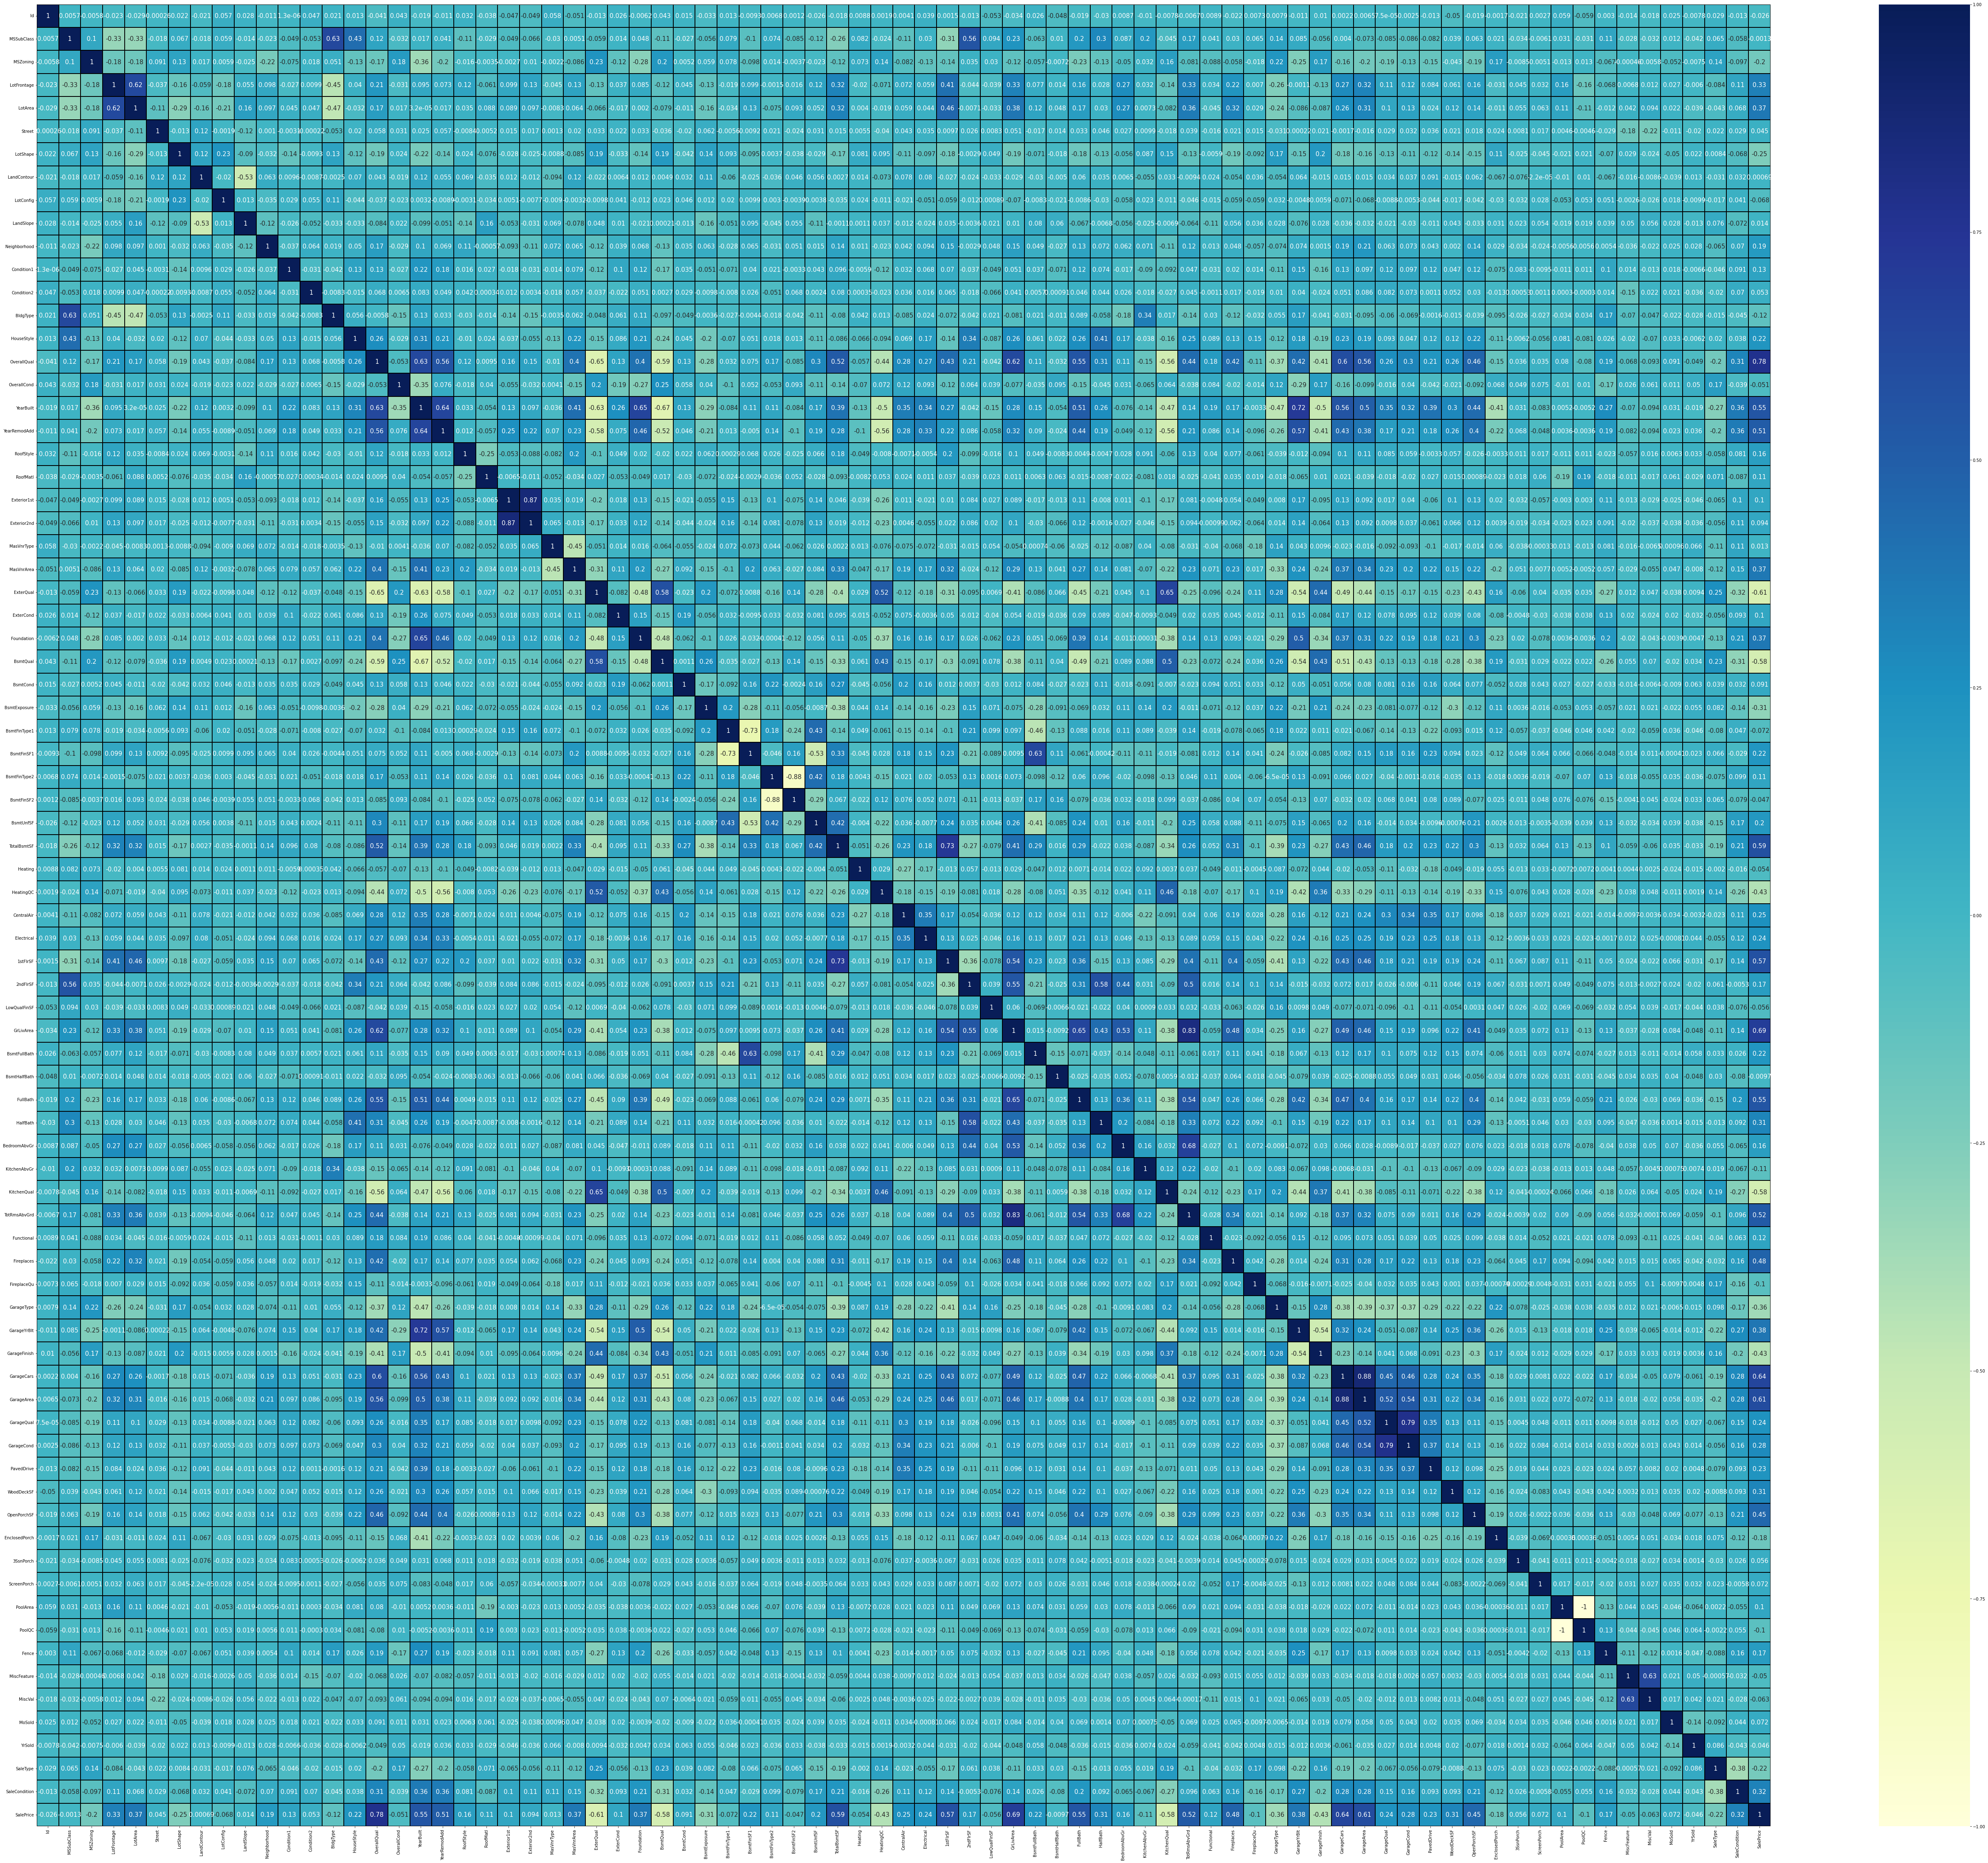

In [120]:
plt.figure(figsize=(95,82))
sns.heatmap(df3.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [121]:
x=df3.drop('SalePrice',axis=1)
y=df3['SalePrice']

In [122]:
x


Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0    -1.544968    1.370435 -0.162456     0.059168 -1.213954  0.058621   
1     0.461941   -1.167999 -0.162456     1.125419  1.100521  0.058621   
2     0.254221    0.490047 -0.162456     1.007390  0.158048  0.058621   
3    -1.610857   -1.167999 -0.162456     1.502635  0.496002  0.058621   
4    -0.635571   -1.167999 -0.162456     0.059168  1.196626  0.058621   
...        ...         ...       ...          ...       ...       ...   
1163 -1.008279   -1.167999 -0.162456     0.059168  0.137703  0.058621   
1164 -0.299331   -1.167999 -0.162456    -0.086810 -0.084786  0.058621   
1165 -1.300337    1.700798 -0.162456    -2.858284 -2.681835  0.058621   
1166 -1.975680    0.696557 -2.926464    -0.988680 -0.148203  0.058621   
1167 -0.147481    0.490047 -0.162456     0.059168 -0.302416  0.058621   

      LotShape  LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  \
0    -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1    -1.366794     0.341434   0.617281   4.188040  ...     3.360787 -0.077648   
2    -1.366794     0.341434  -1.482445  -0.238775  ...    -0.297551 -0.077648   
3    -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
4    -1.366794     0.341434  -1.025661  -0.238775  ...    -0.297551 -0.077648   
...        ...          ...        ...        ...  ...          ...       ...   
1163 -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1164  0.753907     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1165  0.753907     0.341434  -1.025661  -0.238775  ...    -0.297551 -0.077648   
1166  0.753907     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1167 -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   

        PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  \
0     0.077648  0.503226    -0.128107 -0.193133 -1.719437 -0.604806  0.409069   
1     0.077648  0.503226    -0.128107 -0.193133  1.320612 -0.604806  0.409069   
2     0.077648  0.503226    -0.128107 -0.193133 -0.076750 -0.604806  0.409069   
3     0.077648 -1.935972    -0.128107 -0.193133 -2.209015  1.649761 -2.769993   
4     0.077648  0.503226    -0.128107 -0.193133 -0.076750  0.899576  0.409069   
...        ...       ...          ...       ...       ...       ...       ...   
1163  0.077648 -1.935972    -0.128107 -0.193133 -1.719437  1.649761  0.409069   
1164  0.077648 -1.935972    -0.128107 -0.193133 -0.456480  0.899576  0.409069   
1165  0.077648  0.503226    -0.128107 -0.193133  0.288878  0.899576  0.409069   
1166  0.077648 -1.935972    -0.128107 -0.193133  0.288878  0.148070  0.409069   
1167  0.077648  0.503226    -0.128107 -0.193133 -0.076750 -1.359003  0.409069   

      SaleCondition  
0          0.029735  
1          0.029735  
2          0.029735  
3          0.029735  
4          0.029735  
...             ...  
1163       0.029735  
1164       0.029735  
1165       0.029735  
1166       0.029735  
1167       0.029735  

[1168 rows x 78 columns]

In [123]:
y


0       128000.0
1       268000.0
2       269790.0
3       190000.0
4       215000.0
          ...   
1163    122000.0
1164    108000.0
1165    148500.0
1166     40000.0
1167    183200.0
Name: SalePrice, Length: 1168, dtype: float64

In [124]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [125]:
vif_calc()


    VIF Factor       features
0     1.077788             Id
1     6.336106     MSSubClass
2     1.444845       MSZoning
3     2.148669    LotFrontage
4     2.730096        LotArea
..         ...            ...
73    1.888419        MiscVal
74    1.094664         MoSold
75    1.113796         YrSold
76    1.360300       SaleType
77    1.464850  SaleCondition

[78 rows x 2 columns]


# Scaling the Data


In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0    -1.544968    1.370435 -0.162456     0.059168 -1.213954  0.058621   
1     0.461941   -1.167999 -0.162456     1.125419  1.100521  0.058621   
2     0.254221    0.490047 -0.162456     1.007390  0.158048  0.058621   
3    -1.610857   -1.167999 -0.162456     1.502635  0.496002  0.058621   
4    -0.635571   -1.167999 -0.162456     0.059168  1.196626  0.058621   
...        ...         ...       ...          ...       ...       ...   
1163 -1.008279   -1.167999 -0.162456     0.059168  0.137703  0.058621   
1164 -0.299331   -1.167999 -0.162456    -0.086810 -0.084786  0.058621   
1165 -1.300337    1.700798 -0.162456    -2.858284 -2.681835  0.058621   
1166 -1.975680    0.696557 -2.926464    -0.988680 -0.148203  0.058621   
1167 -0.147481    0.490047 -0.162456     0.059168 -0.302416  0.058621   

      LotShape  LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  \
0    -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1    -1.366794     0.341434   0.617281   4.188040  ...     3.360787 -0.077648   
2    -1.366794     0.341434  -1.482445  -0.238775  ...    -0.297551 -0.077648   
3    -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
4    -1.366794     0.341434  -1.025661  -0.238775  ...    -0.297551 -0.077648   
...        ...          ...        ...        ...  ...          ...       ...   
1163 -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1164  0.753907     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1165  0.753907     0.341434  -1.025661  -0.238775  ...    -0.297551 -0.077648   
1166  0.753907     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   
1167 -1.366794     0.341434   0.617281  -0.238775  ...    -0.297551 -0.077648   

        PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  \
0     0.077648  0.503226    -0.128107 -0.193133 -1.719437 -0.604825  0.409069   
1     0.077648  0.503226    -0.128107 -0.193133  1.320612 -0.604825  0.409069   
2     0.077648  0.503226    -0.128107 -0.193133 -0.076750 -0.604825  0.409069   
3     0.077648 -1.935972    -0.128107 -0.193133 -2.209015  1.649742 -2.769993   
4     0.077648  0.503226    -0.128107 -0.193133 -0.076750  0.899557  0.409069   
...        ...       ...          ...       ...       ...       ...       ...   
1163  0.077648 -1.935972    -0.128107 -0.193133 -1.719437  1.649742  0.409069   
1164  0.077648 -1.935972    -0.128107 -0.193133 -0.456480  0.899557  0.409069   
1165  0.077648  0.503226    -0.128107 -0.193133  0.288878  0.899557  0.409069   
1166  0.077648 -1.935972    -0.128107 -0.193133  0.288878  0.148052  0.409069   
1167  0.077648  0.503226    -0.128107 -0.193133 -0.076750 -1.359021  0.409069   

      SaleCondition  
0          0.029735  
1          0.029735  
2          0.029735  
3          0.029735  
4          0.029735  
...             ...  
1163       0.029735  
1164       0.029735  
1165       0.029735  
1166       0.029735  
1167       0.029735  

[1168 rows x 78 columns]

# MODELLING FOR SALE - PRICE


# Building REGRESSION Model As Target Column's Has iNTEGER OUTPUT


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling


# Getting the best random state


In [128]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu*100, 'Random_State',maxRS)

R2 Score= 89.88201559646672 Random_State 50


In [129]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)


# Linear Regression


In [130]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',(r2_score(y_test,predLR))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 83.6541457652604
MAE: 22550.753402882412
MSE: 983864461.4848422
RMSE: 31366.613803291584


# Random Forest Regressor


In [131]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',(r2_score(y_test,predrf))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 89.9286273156156
MAE: 16610.961908831912
MSE: 606200539.9189143
RMSE: 24621.14010193099


# Gradient Boosting Regressor


In [132]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',(r2_score(y_test,predgb))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 89.02229022655948
MAE: 16295.56501554282
MSE: 660753384.893684
RMSE: 25705.12370897452


# Bagging Regressor


In [133]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',(r2_score(y_test,predbr))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 88.0341568203946
MAE: 18290.264672364672
MSE: 720229587.701453
RMSE: 26837.093503236392


# Cross- Validation


In [134]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean()*100)

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean()*100)

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean()*100)

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean()*100)

74.84232187303193
84.37628186459332
87.38407558359675
83.97296447294295


From the accuracy score and cross validation we can see that Gradient Booster Regressor is the best model.



# Hyper Parameter Tuning for the model with best acc and cv score


In [135]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [136]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [137]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [138]:
GCV.best_params_


{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [139]:
Prices = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Prices.fit(x_train, y_train)
pred = Prices.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 88.43199637261941
RMSE value: 24621.14010193099


After HyperParameter tuning we have received an accuracy score of 90 %



# Saving the model


In [140]:
import joblib
joblib.dump(Prices,"House_Price_Prediction.pkl")

['House_Price_Prediction.pkl']

# CONCLUSION : -
THE ACCURACY RATE FOR FLIGHT PRICE PREDICTION IS 91 %